<a href="https://colab.research.google.com/github/alexlisker/churn/blob/main/alisker_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*GitHub Repository alexlisker churn*](https://github.com/alexlisker/churn)

***
#**PROYECTO FINAL** $$Curso  Concurso$$
  <div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1W9huGKMv4cJk-SIvgeok3_Yf4dudBWkn" width="200" height="150">
 </div>

##Universidad Central
###Predicción Churn clientes
**Ing. Guillermo Alexander Lisker**<br>
ETB S.A. ESP
***

##TABLA DE CONTENIDO
1. Introducción: Planteamiento del problema
2. Importar librerias necesarios
3. Exploración de datos
4. Procesamiento de datos
5. Construcción de modelos:<br>
* Arboles de decisión
* Random Fores
* XGBoost
6. Hiperparámetros
7. Validación cruzada
8. Evaluación del modelo
* Matriz de confusión
* AUC-ROC
* Selección del modelo
9. Propuesta de soluciones, caso ETB.


## INTRODUCCION CHURN DE LA RED
###1. Planteamiento del problema
El **churn** en una empresa de telecomunicaciones se refiere a la *tasa* de clientes que cancelan sus servicios dentro de un período determinado. Es una métrica crucial porque indica la pérdida de clientes y puede afectar significativamente los ingresos y la estabilidad de la empresa. <br>
Reducir el churn es esencial para mantener una base de clientes sólida y asegurar el crecimiento a largo plazo.


Predecir el churn en una empresa de telecomunicaciones implica utilizar técnicas de análisis de datos y modelos predictivos para identificar qué clientes tienen mayor probabilidad de cancelar sus servicios en el futuro. Este proceso incluye:

**Recolección de datos**: Recopilar información sobre los clientes, como datos demográficos, historial de uso de servicios, métodos de pago y duración del contrato.<br>
**Análisis exploratorio de datos (EDA)**: Examinar los datos para identificar patrones y relaciones que puedan influir en la decisión de un cliente de abandonar el servicio.<br>
**Modelado predictivo**: Utilizar algoritmos de machine learning, como árboles de decisión, bosques aleatorios, y regresión logística, para crear modelos que predigan la probabilidad de churn.<br>
**Evaluación del modelo**: Validar el modelo utilizando métricas como precisión, recall, y el área bajo la curva ROC para asegurar su efectividad2.
La predicción del churn permite a las empresas de telecomunicaciones tomar medidas proactivas para retener a los clientes en riesgo, mejorando así la satisfacción y la fidelidad del cliente.
  <div align="center">
  <img src="https://drive.google.com/uc?export=view&id=1EQuL54yTXJbpufWksDELiFbY3LVbgENk">
 </div>

Para el caso de ETB, desde hace dos años hemos experimentado un incremento considerable en el churn, dado las afectaciones de servicio en forma masiva, nuestra red está siendo víctima de múltiples incidentes afectando enormemente el nivel de satisfacción de nuestros clientes.

Predecir el churn, es crucial para las empresas de telecomunicaciones por varias razones:

1. **Retención de Clientes**: Retener a un cliente existente es generalmente más económico que adquirir uno nuevo. Las empresas pueden identificar señales tempranas de abandono y desarrollar estrategias específicas para mejorar la retención.

2. **Optimización de Recursos**: Al predecir el churn, las empresas pueden dirigir sus recursos de manera más eficiente, enfocándose en los clientes que tienen mayor riesgo de abandonar el servicio.

3. **Mejora en la Satisfacción del Cliente**: Entender las razones detrás del churn permite a las empresas mejorar sus servicios y productos, aumentando la satisfacción del cliente y reduciendo la tasa de deserción.
4. **Competitividad**: En un mercado altamente competitivo, como el de las telecomunicaciones, mantener una base de clientes sólida es esencial para la supervivencia y el crecimiento de la empresa.

# *Importar librerias* #
Se importan las librerias necesarias y se monta la unidad de Google Drive donde se almacenan las datos.
-- pendiente GitHub

In [209]:
from google.colab import drive

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Importa roc_curve from sklearn.metrics
from sklearn.metrics import roc_curve
# Importa la  'metrics' module for accuracy calculation
from sklearn import metrics
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, auc)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#biblioteca de aprendizaje automatico
#from sklearn.neighbors import KNeighborsClassifier



###*Cargue de información archivo base*

WA_Fn-UseC_-Telco-Customer-Churn.csv

In [212]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [213]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Verificar el tamaño del Dataframe

In [215]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 7043
Number of Columns : 21


###Información del DataFrame
El conjunto de datos incluye información sobre:

**Churn**: Clientes que se fueron en el último mes</div>

**Servicios de cada cliente**: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas

**Información de la cuenta del cliente**: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales

**Información demográfica sobre los clientes**: genero, rango de edad y si tienen parejas y dependientes

Se verifica el tipo de datos de cada columna:

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Describimos los datos obtenidos
Primero los que tienen valores numericos

In [217]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Luego los datos con valores no numericos

In [218]:
#resumen de los datos no numéricos (como texto o categorías) en mi DataFrame
df.describe(exclude=np.number)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


###Variables disponibles
Tipo *float64*(1)<br>
Tipo *int64*(2)<br>
Tipo *object*(18)<br>

Se identifica que:
**customerID**: No es relevante para el modelo, se puede prescindir de ella.<br>
**Variable categoricas** como:<br>
gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, PaymentMethod y Churn<br>
**Variables numericas** como:<br>
tenure	MonthlyCharges<br>
**Variables binarias** como:<br>
SeniorCitizen<br>

En la implementación de los modelos, se encuentra con el requerimiento de los algoritmos que las variables categóricas deben ser convertidas en binarias.


# *Verificación de columnas* #
Para el ejercicio, la columna *'customerID'* no es relevante y se procede a eliminarla.

In [219]:
df=df.drop(columns='customerID',axis=1)

## Depuración de datos
Se identifican 11 valores vacios en la columna de **TotalCharges** procedemos a reemplazar este valor por el promedio.   
$2283.3

Esto para no alterar la información

In [220]:
print("La cantidad de valores invalidos en Total Charges es: ")
df[df['TotalCharges'] == ' ']['TotalCharges'].value_counts()

La cantidad de valores invalidos en Total Charges es: 


,count
TotalCharges,
,11


In [221]:
df[ df['TotalCharges']== ' ']
#df[ df['TotalCharges']== ' '].shape

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Procedemos a verificar si se tiene alguna celda *null*.<br>
Este es un paso crucial en el análisis de datos, ya que le permite tomar decisiones informadas sobre cómo manejar estos valores faltantes antes de crear sus modelos de predicción.

In [222]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


###Depuración de la varibles 'TotalCharges'
Dado que se identifica que esta variable contiene un caracter ' ' no valido y por ende, es tratada como objeto, se implementa codigo para reemplazar estos valores por el promedio de la columna que se convierte tipo *float*.

In [223]:
# Se saca el promedio numerico de la columa df['TotalCharges'] pero sin tener en cuenta los valores 0
# Se convierte la columna 'TotalCharges' a float
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']=df['TotalCharges'].replace(' ','0.0')
df['TotalCharges']=df['TotalCharges'].astype(float)

# Se calcula el promedio de 'TotalCharges', excluyendo 0.0
prom_total_charges = df.loc[df['TotalCharges'] != 0, 'TotalCharges'].mean()

print(f"El promedio de la columna 'TotalCharges' sin tener en cuenta los valores 0 es: {prom_total_charges}")


El promedio de la columna 'TotalCharges' sin tener en cuenta los valores 0 es: 2283.300440841866


In [224]:
df['TotalCharges']=df['TotalCharges'].replace(0.0,prom_total_charges)
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [225]:
print(df[df['TotalCharges'] == 0.0].value_counts())

Series([], Name: count, dtype: int64)


In [226]:
df[df['TotalCharges'] == 0]['TotalCharges'].value_counts()

,count
TotalCharges,


Se verifica el resultado de implementación del código anterios.

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Nueva descripcion de los datos

In [228]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# *Datos faltantes y Duplicados* #
Se realiza una verificación rápida si en el df se encuentran datos duplicados.<br>
Se identifican 22 filas con datos duplicados, los cuales deben ser eliminados.



In [229]:
print("La cantidad de filas duplicas es: ",df.duplicated().sum())
df.shape

La cantidad de filas duplicas es:  22


(7043, 20)

In [230]:
df.duplicated().describe()

,0
count,7043
unique,2
top,False
freq,7021


Procedemos a eliminar las filas con los datos duplicados

In [231]:
df.drop_duplicates(inplace=True)
#inplace=True  Significa que los cambios se realizan directamente en el mismo df

Nuevas dimensiones de Data Frame sin las filas duplicadas

In [232]:
df.shape

(7021, 20)

Verificación completa del Data Frame sin datos nulos

In [233]:
df.isna().sum()
#df.isna()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [234]:
print(f"Numero de filas: {df.shape[0]}\nNumero de columnas : {df.shape[1]}")

Numero de filas: 7021
Numero de columnas : 20


###Columna *tenure*
También se puede observar que la columna Antiguedad es 0 para algunas (11) entradas, aunque la columna MonthlyCharges no esté vacía, pero la columna TotalCharges este en 0
Veamos si hay otros valores 0 en la columna de tenencia.

In [235]:
df[ df['tenure']== 0].shape

(11, 20)

In [236]:
#df[ df['tenure']== 0].describe()
df[ df['tenure']== 0].head(11)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


**Se procede a eliminar estas filas con tenure=0<br>**
Este código encuentra todas las filas en las que 'tenure' es 0 (tal vez se trate de nuevos clientes) y elimina esas filas enteras, incluyendo su index.

In [237]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [238]:
df[ df['tenure']== 0].shape

(0, 20)

In [239]:
df.shape

(7010, 20)

# *Visualización de datos* #

##Histograma de frecuencia del *churn*

In [240]:
color_discrete_map = {"No": "lightblue", "Yes": "pink"}

fig = px.histogram(df, x="Churn",color="Churn",title="<b>Distribución del Churn<b>", color_discrete_map=color_discrete_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Se muestran los procentajes del Yes y del No

In [241]:
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / churn_counts.sum() * 100).round(2)
churn_percentages

,count
Churn,
No,73.51
Yes,26.49


##Distribución numerica

El histograma se divide en 30 intervalos, lo que permite visualizar la distribución de los datos en esos rangos específicos.<br>
El parámetro **kde=True** en sns.histplot se utiliza para agregar una estimación de densidad de Kernel (Kernel Density Estimate) al histograma. La KDE es una técnica para estimar la función de densidad de probabilidad de una variable aleatoria de manera suave. Esto ayuda a visualizar la distribución subyacente de los datos de una manera más continua y suave en comparación con el histograma, que es discreto.

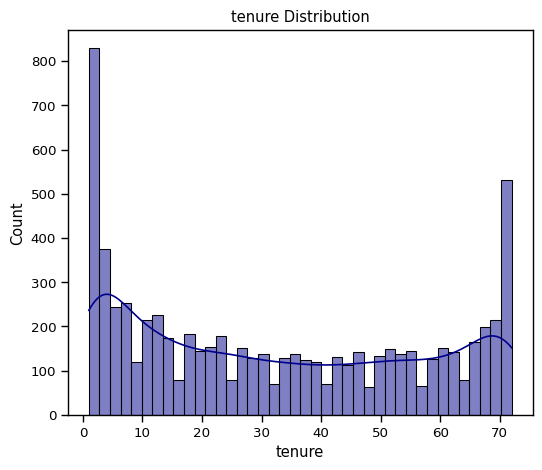

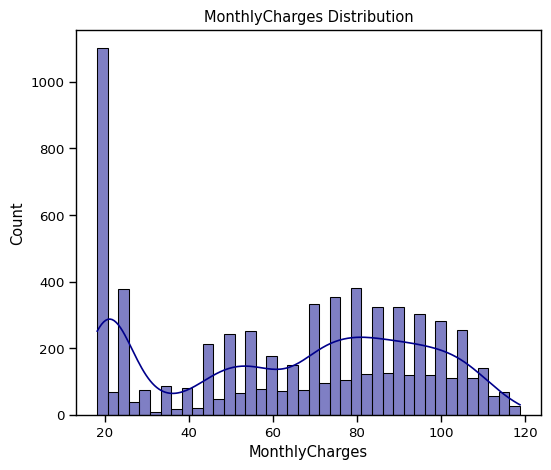

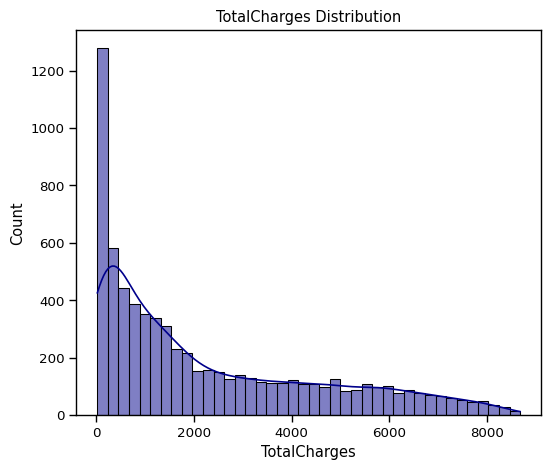

In [242]:
# Numerical Features Distribution
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(6, 5))
    sns.histplot(df[col], bins=40, kde=True, color="darkblue")
    plt.title(f"{col} Distribution")
    plt.show()

##*Distribución de las variables categóricas*
Genero, si tiene pareja, si son dependientes, tipo de conexion a internet, contrato y metodo de pago.

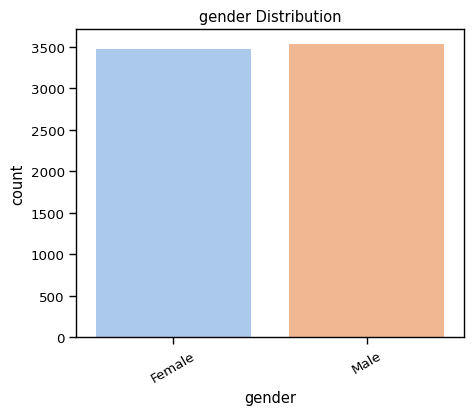

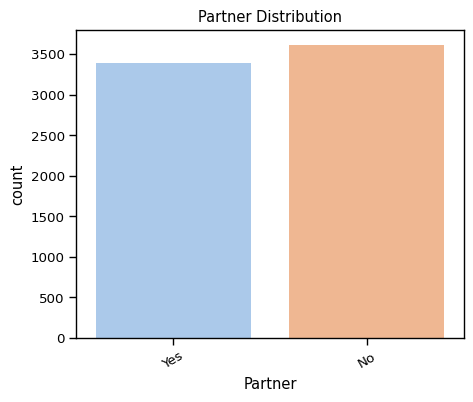

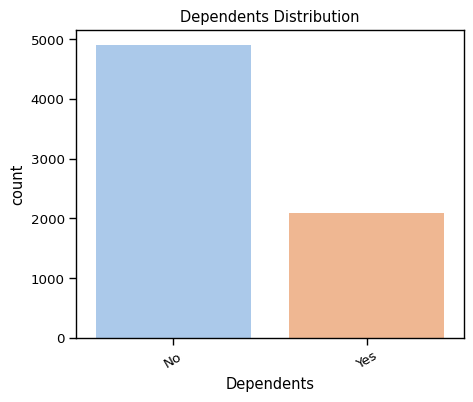

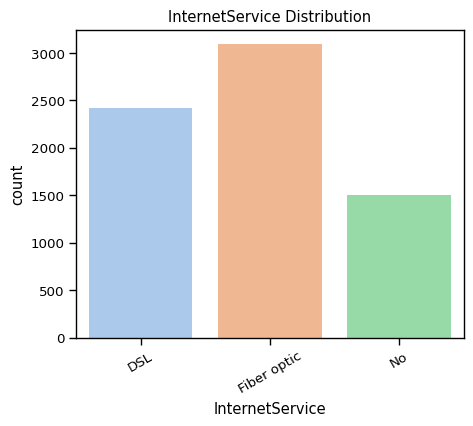

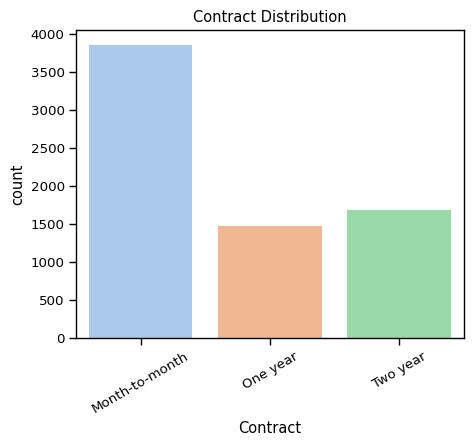

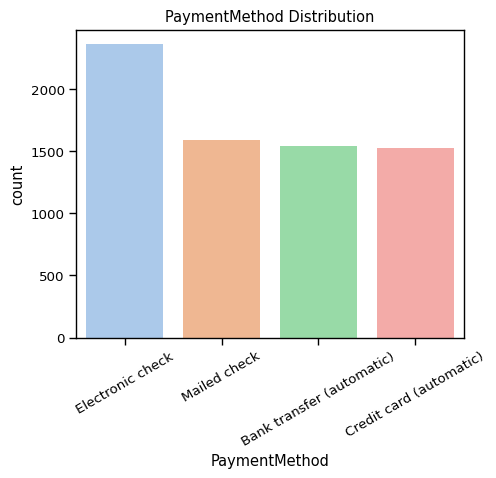

In [243]:
# Distribucion de variables categoricas
categorical_features = ["gender", "Partner", "Dependents", "InternetService", "Contract", "PaymentMethod"]
for col in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, hue=col, palette="pastel")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
    plt.show()

In [244]:
color_map = {"Yes": "lightblue", "No": "pink"}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Distribución del por servicio telefónico</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Una fracción muy pequeña de clientes no tiene servicio telefónico y de esos 1/3 de los clientes (170) tienen más probabilidades de desertar.<br>
Adicionalmente, la mayoría de clientes que tienen servicio telefónico, tienen más probabilidad de continuar.<br>
Eso explica que el posicionamiento o el querer conservar su número telefónico asignado, es motivo que los clientes no abandonen el servicio.



##Gráfico de bigotes
Churn vs Cargos Mensuales

In [245]:
# Churn vs. Cargos mensuales (Boxplot)
fig = px.box(df, x='Churn', y = 'MonthlyCharges',color='Churn',color_discrete_map={'Yes': 'pink', 'No': 'lightblue'})

# propiedades eje Y: yaxis
fig.update_yaxes(title_text='Cargos (Mes)', row=1, col=1)
# propiedades eje x: xaxis
fig.update_xaxes(title_text='Churn', row=1, col=1)

# titulo y tamaño
fig.update_layout(autosize=True, width=850, height=600,
    title='<b>Churn vs Cargos Mensuales</b>',
)

fig.show()

En Cargos Mensuales, no identificamos valores atipicos.

Los cliente con menor cargo mensual, tienen menos probabilidad de abandonar el servicio.

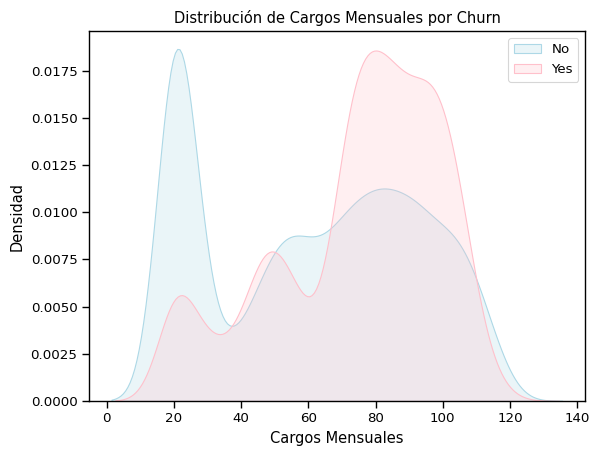

In [246]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="lightblue", fill = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="pink", fill= True);
ax.legend(["No","Yes"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Cargos Mensuales');
ax.set_title('Distribución de Cargos Mensuales por Churn');

In [247]:
# Churn vs. Antiguedad (mes) (Boxplot)
fig = px.box(df, x='Churn', y = 'tenure',color='Churn',color_discrete_map={'Yes': 'pink', 'No': 'lightblue'})

# propiedades eje Y: yaxis
fig.update_yaxes(title_text='Antiguedad (Mes)', row=1, col=1)
# propiedades eje x: xaxis
fig.update_xaxes(title_text='Churn', row=1, col=1)

# titulo y tamaño
fig.update_layout(autosize=True, width=850, height=600,
    title='<b>Antiguedad vs Churn</b>',
)

fig.show()


Los clientes antiguos tiene más probabilidad de continuar con el servicio.

En este diagrama de caja o *boxplot* se presumen unos valores atipico de la Antiguedad en el *Yes* del Churn.<br>
Se verifica si resulta alguno en la variables numericas segun:<br>
Q1<br>
IQR<br>
Q3<br>



In [248]:
#valores atípicos
def remove_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[(df1[column] <= lower_bound) & (df1[column] >= upper_bound)]

# Inicializar df_cleaned con una copia de df antes de usarlo
df_cleaned = df.copy()  # Crear una copia para no modificar el DataFrame original
df_cleaned = remove_outliers(df_cleaned, 'tenure')
df_cleaned = remove_outliers(df_cleaned, 'MonthlyCharges')
df_cleaned = remove_outliers(df_cleaned, 'TotalCharges')

df_cleaned.shape

(0, 20)

##*No se identifican valores atipicos en la variables numéricas

###Mapa de calor de las variables numéricas
* Antiguedad: tenure<br>
* Cargos Mensuales<br>
* Total Cargos

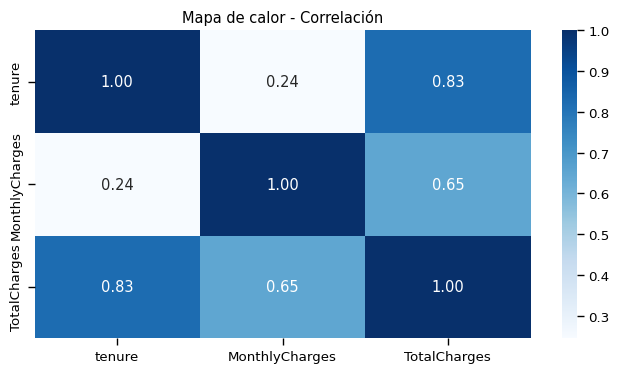

In [249]:
# matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de calor - Correlación")
plt.show()

En este mapa de calor, se identifica una fuerte correlación entre los cargos totales y la antigüedad, aunque puede llegar a ser lógico dado que representa el total de los ingresos, también se puede considerar que los clientes antiguos han aportado mucho más y así considerar algún beneficio y políticas de retención.

##Matriz de Correlación
Se relacionan todas la variables del modelo.

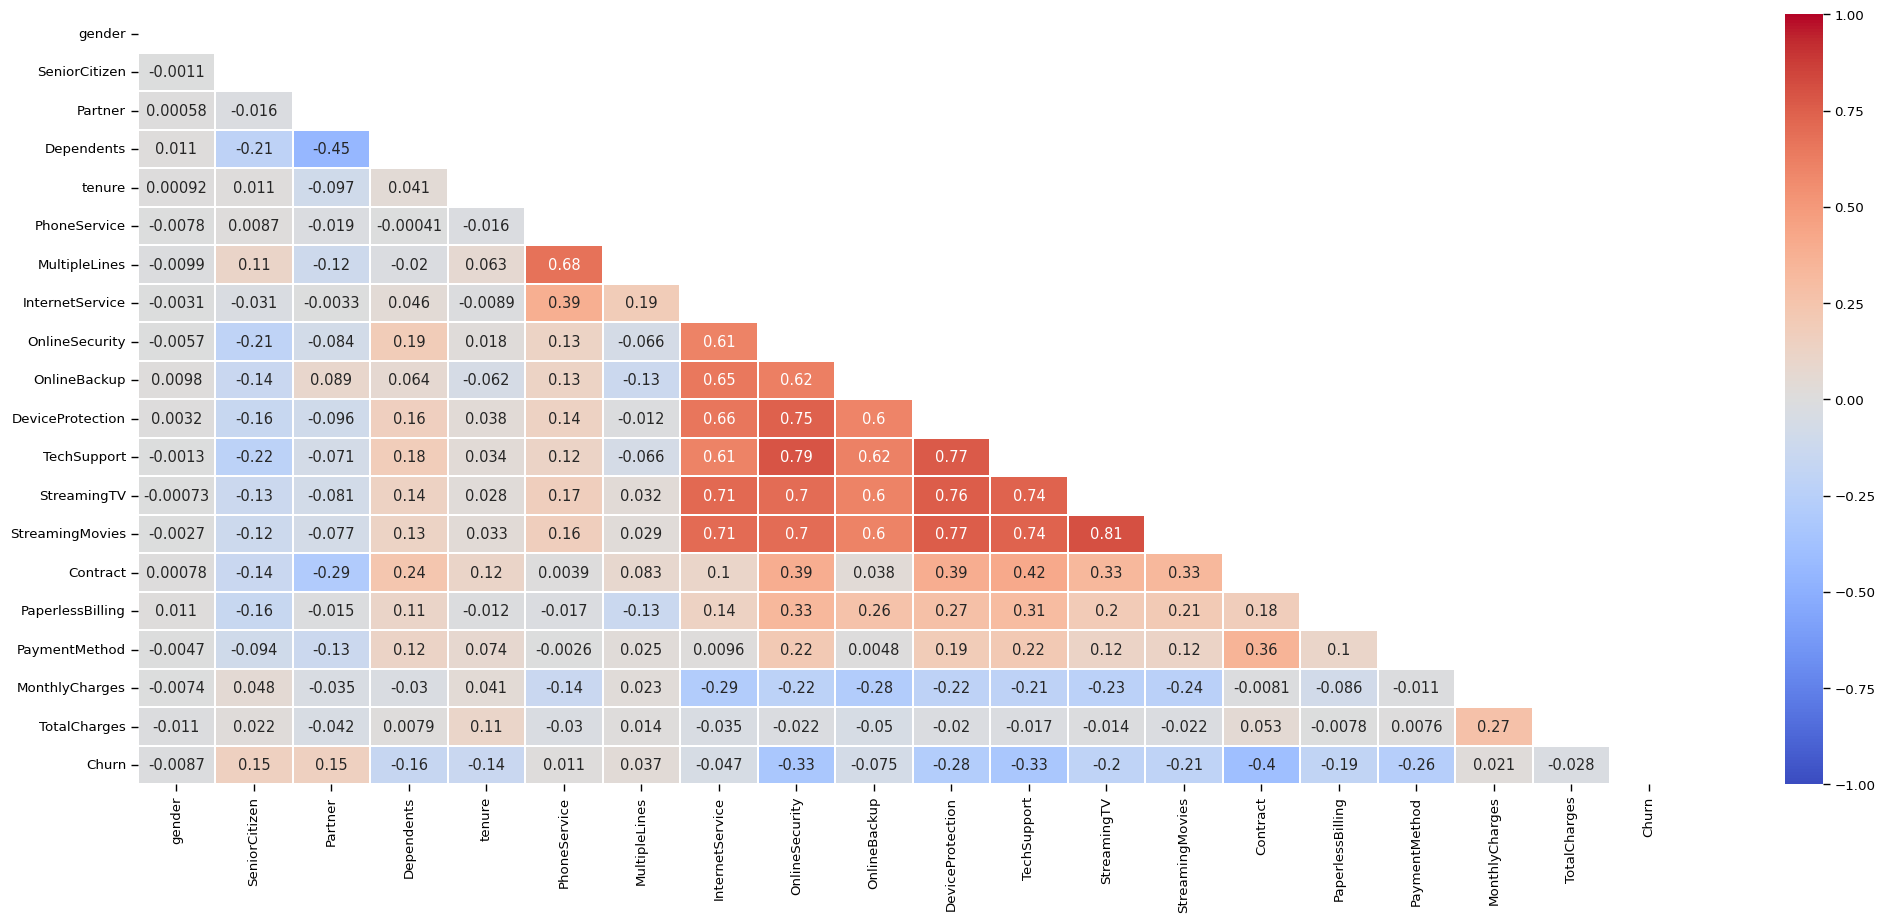

In [250]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [251]:
# Churn vs. Cargos Totales (Boxplot)
fig = px.scatter(df, x='tenure', y = 'TotalCharges',color='tenure',color_discrete_map={'Yes': 'pink', 'No': 'lightblue'})
#fig = px.box(df, y= 'TotalCharges',color_discrete_map={'Yes': 'pink', 'No': 'lightblue'})
# propiedades eje Y: yaxis
fig.update_yaxes(title_text='Cargos totales', row=1, col=1)
# propiedades eje x: xaxis
fig.update_xaxes(title_text='tenure', row=1, col=1)

# titulo y tamaño
fig.update_layout(autosize=True, width=850, height=600,
    title='<b>Cargos Totales vs Antiguedad</b>',
)

fig.show()

# *Procesamiento de Datos* #
La codificación de variables categóricas mediante el uso de ***one-hot*** encoding es una técnica utilizada en el procesamiento de datos para convertir variables categóricas en una forma que pueda ser utilizada por algoritmos de aprendizaje automático. <br>

One-hot encoding transforma cada categoría de una variable categórica en una nueva columna binaria. Cada columna representa una categoría y contiene valores de 0 o 1, indicando la presencia o ausencia de esa categoría en una fila de datos.<br>

|Genero|Valor
|----|----|
|Female|	1
|Male|	0



In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

#Preparar los datos para el modelo
## Nos aseguramos que todos los datos sean numericos
La clase **LabelEncoder()** es una herramienta del módulo sklearn.preprocessing (parte de la biblioteca Scikit-learn) que se utiliza para convertir datos categóricos en valores numéricos.
En este caso:

"Hombre" se codifica como 0.

"Mujer" se codifica como 1.
"yes" en 1
"no" en 0

In [253]:
encoder=LabelEncoder()
lista_numerica=["tenure", "MonthlyCharges", "TotalCharges"]
df1=df.copy()
encoder=LabelEncoder()
lista_numerica=["tenure", "MonthlyCharges", "TotalCharges"]
df1=df.copy()
for col in df1.columns:
    if col not in  lista_numerica:
        #print(f"Transformando: {df1.loc[0]}")
        df1[col]=encoder.fit_transform(df1[col])
        print(f"Transformando: {df1.loc[0,'gender']}")

Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0
Transformando: 0


In [254]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Comprobanos que todos los datos ahora si son numericos.

In [255]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.504280,0.162767,0.484023,0.299429,32.520399,0.902996,0.943509,0.870471,0.789729,0.906705,0.904708,0.796862,0.986020,0.994009,0.690728,0.593153,1.569615,64.888666,2290.353388,0.264907
std,0.500017,0.369180,0.499780,0.458041,24.520441,0.295985,0.948648,0.736546,0.860846,0.881233,0.881019,0.862557,0.886048,0.886138,0.833345,0.491281,1.066924,30.064769,2266.820832,0.441315
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,408.312500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1403.875000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3807.837500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [256]:
df1['Churn'].value_counts()

,count
Churn,
0,5153
1,1857


In [257]:
# Handel imbalanced data_frame using under_sampling
#is_churn=df1[df1.Churn==1]
#not_churn=df1[df1.Churn==0]
#not_churn_sample=not_churn.sample(n=1857)
#df2=pd.concat([not_churn_sample,is_churn],axis=0)

In [258]:
#df2['Churn'].value_counts()

In [259]:
df1.shape

(7010, 20)

In [260]:
X=df1.drop(columns='Churn',axis=1)
Y=df1['Churn']

###División del conjunto de datos en entrenamiento, validación y prueba (70%-15%-15%).

La división del conjunto de datos en entrenamiento, validación y prueba (70%-15%-15%) es una práctica común en el aprendizaje automático y la ciencia de datos para evaluar el rendimiento de los modelos predictivos.<br>

**Conjunto de Entrenamiento (70%)**
Se utiliza para entrenar el modelo. El modelo aprende patrones y relaciones en los datos. Generalmente, el 70% del conjunto de datos total se asigna al entrenamiento.<br>
**Conjunto de Validación (15%)**
Se utiliza para ajustar hiperparámetros y evaluar el rendimiento del modelo durante el proceso de entrenamiento. Aproximadamente el 15% del conjunto de datos total se asigna a la validación.<br>
El modelo se evalúa en este conjunto de datos después de cada iteración de entrenamiento para ajustar hiperparámetros y mejorar su rendimiento.<br>
**Conjunto de Prueba (15%)**
El 15% restante del conjunto de datos total se asigna a la prueba. Después de que el modelo ha sido entrenado y ajustado, se evalúa en el conjunto de prueba para obtener métricas de rendimiento finales.


In [261]:
# División en entrenamiento y prueba
# 1. Dividir en entrenamiento (70%)y el resto (prueba + validación)
X_train, X_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.30, random_state=47)


# 2. Dividir el resto en validación y prueba
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=47)


In [262]:
print("\nDistribución de Churn en conjunto de entrenamiento (70%):")
df_Atrain=Y_train.value_counts(normalize=True)
print(df_Atrain)
print("\nDistribución de Churn en conjunto de validación (15%):")
df_Aval=Y_val.value_counts(normalize=True)
print(df_Aval)
print("\nDistribución de Churn en conjunto de prueba (15%):")
df_Atest=Y_test.value_counts(normalize=True)
print(df_Atest)


Distribución de Churn en conjunto de entrenamiento (70%):
Churn
0    0.734053
1    0.265947
Name: proportion, dtype: float64

Distribución de Churn en conjunto de validación (15%):
Churn
0    0.74215
1    0.25785
Name: proportion, dtype: float64

Distribución de Churn en conjunto de prueba (15%):
Churn
0    0.73289
1    0.26711
Name: proportion, dtype: float64


In [263]:
print("\n" + "="*50)
print("TAMAÑO DE LAS MUESTRAS")
print("="*50)

print(f'Tamaño del conjunto de entrenamiento (70%): {len(X_train)}')
print(f'Tamaño del conjunto de validación (15%): {len(X_val)}')
print(f'Tamaño del conjunto de prueba (15%): {len(X_test)}')



TAMAÑO DE LAS MUESTRAS
Tamaño del conjunto de entrenamiento (70%): 4907
Tamaño del conjunto de validación (15%): 1051
Tamaño del conjunto de prueba (15%): 1052


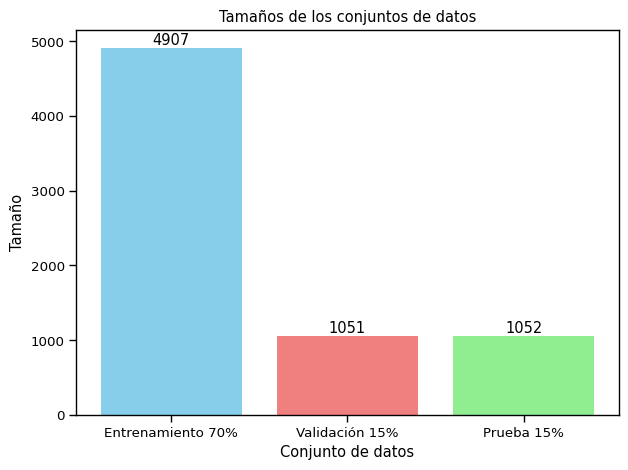

In [264]:
data = {'Dataset': ['Entrenamiento 70%', 'Validación 15%', 'Prueba 15%'],
        'Tamaño': [len(X_train), len(X_val), len(X_test)]}
df_sizes = pd.DataFrame(data)
#df_sizes

plt.figure(figsize=(7, 5))
plt.bar(df_sizes['Dataset'], df_sizes['Tamaño'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Tamaños de los conjuntos de datos')
plt.xlabel('Conjunto de datos')
plt.ylabel('Tamaño')

# Agregar etiquetas de valor encima de cada barra
for i, v in enumerate(df_sizes['Tamaño']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')  # Ajustar el +10 para un mejor espaciado

plt.show()

##DISTRIBUCION DEL CHURN EN LOS CONJUNTOS

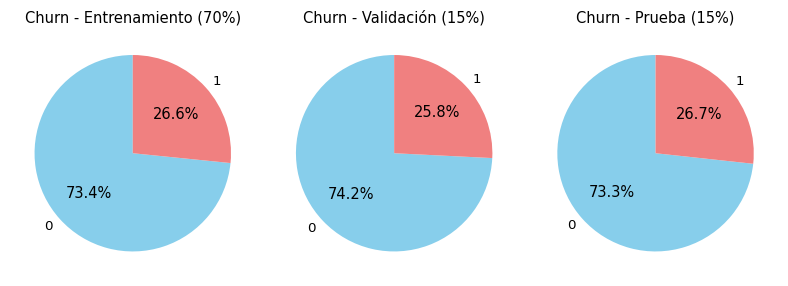

In [265]:
fig, axes = plt.subplots(1, 3, figsize=(8, 5))

# Primer subgráfico
axes[0].pie(df_Atrain, labels=df_Atrain.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[0].set_title('Churn - Entrenamiento (70%)')

# Segundo subgráfico
axes[1].pie(df_Aval, labels=df_Aval.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[1].set_title('Churn - Validación (15%)')

# Tercer subgráfico (en una nueva figura)
axes[2].pie(df_Atest, labels=df_Atest.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[2].set_title('Churn - Prueba (15%)')

plt.tight_layout()
plt.show()


***
#MODELAMIENTO POR ARBOLES DE DECISION
***

La *precisión (accuracy)* en un modelo de clasificación es una métrica que indica el porcentaje de predicciones correctas realizadas por el modelo.<br>
Se calcula como la proporción de todas las predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones realizadas.

La fórmula para calcular la precisión es:

$$Accuracy=(TP+TN)/(TP+TN+FP+FN)$$

In [266]:
# Crear y entrenar el modelo DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=47)

#entrenamiento del modelo con el 70%
dt_model.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=47)

Se realizan las predicciones en conjunto de Entrenamiento (70%)

In [267]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = dt_model.predict(X_train)
val_accuracy_train = accuracy_score(Y_train, y_train_pred)
print(f"Precisión en validación: {val_accuracy_train}")
print(classification_report(Y_train, y_train_pred))

Precisión en validación: 0.9991848379865498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3602
           1       1.00      1.00      1.00      1305

    accuracy                           1.00      4907
   macro avg       1.00      1.00      1.00      4907
weighted avg       1.00      1.00      1.00      4907



###Se realizan las predicciones en conjunto de validación (15%)

In [268]:

# Realizar predicciones en el conjunto de validación
y_val_pred = dt_model.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Precisión en validación: {val_accuracy}")

Precisión en validación: 0.7278782112274025


###Reporte de métricas de rendimiento en conjunto de validación (15%)

In [269]:
print(classification_report(Y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       780
           1       0.47      0.49      0.48       271

    accuracy                           0.73      1051
   macro avg       0.65      0.65      0.65      1051
weighted avg       0.73      0.73      0.73      1051



####Se realizan las predicciones en conjunto de prueba (15%)

In [270]:
#Realizar predicciones en el conjunto de prueba
y_test_pred = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Accuracy para el arbol de decisión en prueba :",accuracy_dt)

Accuracy para el arbol de decisión en prueba : 0.7214828897338403



El árbol de decisión da una puntuación muy baja.

In [271]:
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       771
           1       0.48      0.50      0.49       281

    accuracy                           0.72      1052
   macro avg       0.65      0.65      0.65      1052
weighted avg       0.73      0.72      0.72      1052



In [272]:
# classification reports
report_train = classification_report(Y_train, y_train_pred, output_dict=True)
report_val = classification_report(Y_val, y_val_pred, output_dict=True)
report_test = classification_report(Y_test, y_test_pred, output_dict=True)

# Se extraen metricas
classes = ['Churn: 0', 'Churn: 1']  # Assuming your classes are 0 and 1
metrics = ['precision', 'recall', 'f1-score']
datasets = ['Train', 'Validation', 'Test']

# Create a list to store the data for the DataFrame
data = []
for dataset, report in zip(datasets, [report_train, report_val, report_test]):
    for metric in metrics:
        for cls in classes:
            data.append([dataset, metric, cls, report[str(cls.split(': ')[1])][metric]])  # Extract class value

# Create a pandas DataFrame
df_graf = pd.DataFrame(data, columns=['Dataset', 'Metric', 'Class', 'Score'])

# Create the grouped bar chart using px.bar
fig = px.bar(df_graf, x='Metric', y='Score', color='Dataset', barmode='group', facet_col='Class',
             title='Reporte de clasificaión por Arboles de Decisión',
             labels={'Score': 'Score', 'Metrica': 'Metrica', 'Dataset': 'Dataset'},
             category_orders={'Metric': ['precision', 'recall', 'f1-score']},
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use pastel color shades

fig.show()

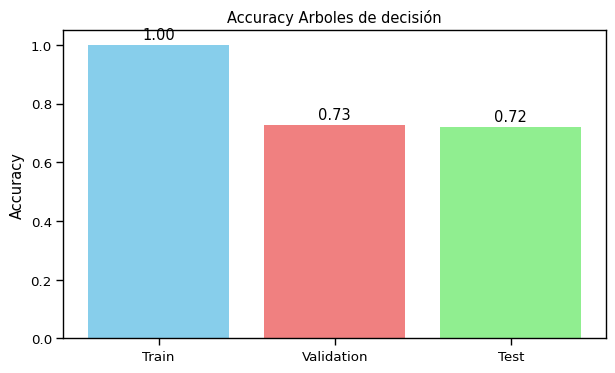

In [273]:
# Calculate accuracy scores
accuracy_train = accuracy_score(Y_train, y_train_pred)
accuracy_val = accuracy_score(Y_val, y_val_pred)
accuracy_test = accuracy_score(Y_test, y_test_pred)

# Create the bar chart
datasets = ['Train', 'Validation', 'Test']
accuracy_scores = [accuracy_train, accuracy_val, accuracy_test]

plt.figure(figsize=(7, 4))
plt.bar(datasets, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy Arboles de decisión')

# Add value labels on top of bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')  # Adjust 0.01 for spacing

plt.show()

###MATRIZ DE CONFUSIÓN
###Arboles de decisión

La matriz de confusión es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación. <br>
Esta matriz compara las predicciones del modelo con los valores reales, organizándolos en una tabla que muestra el número de aciertos y errores para cada clase.
<br>
 Las **filas** representan los casos reales y las columnas representan los casos predicha¿os. Los elementos de la matriz incluyen:

>* **Verdaderos positivos** (TP): Casos correctamente clasificados como positivos. En el modelo: 610
>* **Falsos positivos** (FP): Casos negativos clasificados incorrectamente como positivos. En el modelo: 175
>* **Verdaderos negativos** (TN): Casos correctamente clasificados como negativos. En el modelo: En el modelo 146
>* **Falsos negativos** (FN): Casos positivos clasificados incorrectamente como negativos. En el modelo 121

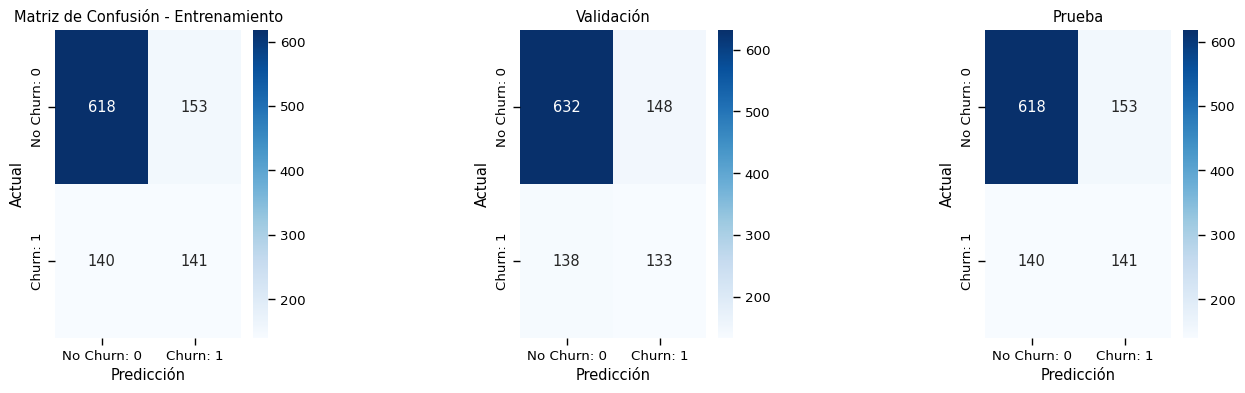

In [274]:
# Genera la matriz de confusión (Prueba)
cm_train = confusion_matrix(Y_train, y_train_pred)
# Genera la matriz de confusión en conjunto de validación
cm_val = confusion_matrix(Y_val, y_val_pred)
# Genera la matriz de confusión (Prueba)
cm_test = confusion_matrix(Y_test, y_test_pred)

# Crea el gráfico de la matriz de confusión usando seaborn
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Entrenamiento')

plt.subplot(1, 3, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Validación')

plt.subplot(1, 3, 3)
#plt.figure(figsize=(8, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Prueba')
plt.subplots_adjust(wspace=1)
plt.show()

###Interpretación matriz de confusión Arboles de decisión
 * La precisión no es tan alta, lo que sugiere que cuando el modelo predice "Sí", la mitad de las veces puede estar equivocado.
 * Recall (53.9%): El modelo identifica alrededor del 54% de los casos positivos reales, lo cual es moderado.
 * El modelo tiene una buena capacidad para identificar correctamente los casos negativos, ya que al rededor del 80% de las veces lo hace bien.
 * El recall es relativamente bajo, lo que sugiere que el modelo tiene dificultades para detectar instancias positivas.



##OPTIMIZANDO MODELO ARBOLES DE DECISION
Se realiza para mejorar el rendimiento del modelo de árbol de decisión para que realice predicciones más precisas y eficaces. Esto se logra ajustando varios parámetros y técnicas durante el entrenamiento del modelo.


 * **Profundidad del árbol -max_depth-** Controlar la profundidad del árbol de decisión puede prevenir el sobreajuste o el subajuste. Un árbol muy profundo puede memorizar los datos de entrenamiento (sobreajuste), mientras que un árbol muy superficial puede no capturar patrones complejos (subajuste). Optimizar la profundidad del árbol implica encontrar un equilibrio adecuado.

 * **Criterio de división -criterion-** Los árboles de decisión se construyen dividiendo los datos en función de ciertos criterios, como la ganancia de información (Information Gain) o el índice de Gini. La optimización consiste en seleccionar el mejor criterio y los parámetros asociados para lograr una partición que maximice la capacidad predictiva del árbol.

 * **Mínimo número de muestras por hoja -min_samples_leaf-**: Este parámetro controla cuántas muestras mínimas deben estar presentes en una hoja o en un nodo antes de realizar una división. Ajustar este número puede ayudar a reducir el sobreajuste, ya que evita divisiones que se basan en un número muy pequeño de ejemplos.

 * **Poda del árbol -min_samples_split-** Después de construir el árbol, la poda elimina ramas que no contribuyen significativamente al modelo, lo que ayuda a reducir el sobreajuste y mejorar la capacidad de generalización del modelo.

 * **Selección de características** (features): A veces, el modelo puede beneficiarse al seleccionar solo un subconjunto relevante de características, en lugar de usar todas las disponibles. Esto puede ayudar a mejorar la precisión de la predicción y hacer que el modelo sea más interpretativo.


La búsqueda de **hiperparámetros** en un modelo de árboles de decisión se refiere al proceso de encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo. Los hiperparámetros son parámetros que controlan el comportamiento y la estructura del modelo, pero que no se aprenden directamente a partir de los datos, sino que deben ser especificados antes del entrenamiento del modelo.

Con la libreria **GridSearchCV** permite realizar una búsqueda exhaustiva de combinaciones de hiperparámetros para un modelo dado. Utiliza validación cruzada para evaluar el rendimiento de cada combinación de parámetros, y selecciona la mejor.


In [275]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best model and its hyperparameters
best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_test_pred_op = best_dt_model.predict(X_test)
accuracy_op = accuracy_score(Y_test, y_test_pred_op)
print("Test Accuracy:", accuracy_op)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.7813688212927756


####cv=5:

El parámetro cv=5 especifica el número de folds o divisiones en la **validación cruzada**. La validación cruzada es un método para evaluar el rendimiento de un modelo al dividir los datos en "k" partes (o "folds"). En este caso, el valor 5 significa que los datos se dividirán en 5 partes. En cada iteración de la validación cruzada, el modelo se entrena con 4 de las 5 partes y se evalúa con la parte restante. Este proceso se repite 5 veces, utilizando cada parte como conjunto de prueba una vez.

In [276]:
print(classification_report(Y_test, y_test_pred_op))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       771
           1       0.61      0.49      0.55       281

    accuracy                           0.78      1052
   macro avg       0.72      0.69      0.70      1052
weighted avg       0.77      0.78      0.77      1052



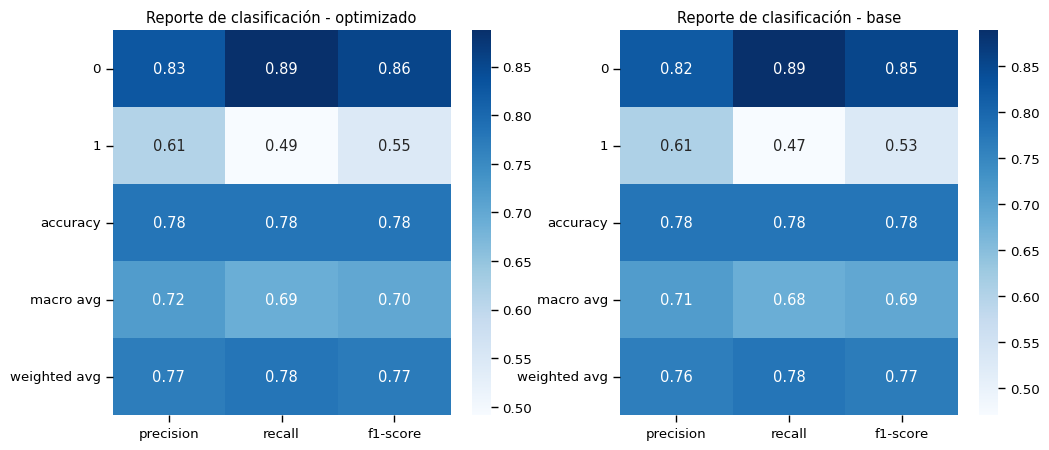


ACCURACY EN OPTIMIZADO Y PRUEBA
Accuracy optimizado: 0.7813688212927756
Accuracy en prueba : 0.7214828897338403


In [346]:
# Reporte de clasificación modelo optimizado
report_dt = classification_report(Y_test, y_test_pred, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()

report_dt_op = classification_report(Y_test, y_test_pred_op, output_dict=True)
report_dt_df_op = pd.DataFrame(report_dt_op).transpose()
# se selecciona solo las metricas relevantes (precision, recall, f1-score)
metrics_df = report_df[['precision', 'recall', 'f1-score']]
metrics_df_op = report_dt_df_op[['precision', 'recall', 'f1-score']]

# mapa de calor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics_df_op, ax=axes[0], annot=True, cmap='Blues', fmt=".2f")
axes[0].set_title('Reporte de clasificación - optimizado') # Fixed indentation

sns.heatmap(metrics_df, ax=axes[1], annot=True, cmap='Blues', fmt=".2f")
axes[1].set_title('Reporte de clasificación - base') # Fixed indentation


plt.show()
print("\n" + "="*50)
print("ACCURACY EN OPTIMIZADO Y PRUEBA")
print("Accuracy optimizado:", accuracy_op)
print("Accuracy en prueba :",accuracy_dt)
print("="*50)

###AUC Área Bajo la Curva - Arboles de decisión

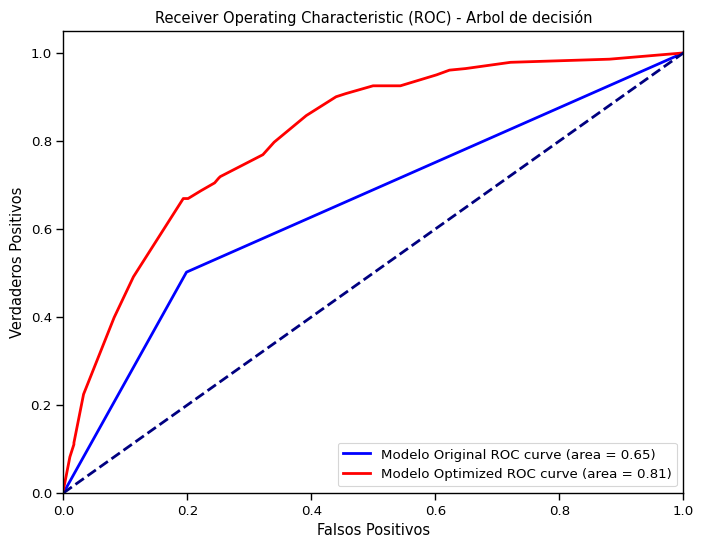

In [278]:
from sklearn.metrics import roc_curve, auc

# --- Original Model ---
fpr, tpr, _ = roc_curve(Y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# --- Optimized Model ---
y_test_prob_op = best_dt_model.predict_proba(X_test)[:, 1]
fpr_dt_op, tpr_dt_op, _ = roc_curve(Y_test, y_test_prob_op)
roc_auc_dt_op = auc(fpr_dt_op, tpr_dt_op)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Modelo Original ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_dt_op, tpr_dt_op, color='red', lw=2, label=f'Modelo Optimized ROC curve (area = {roc_auc_dt_op:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) - Arbol de decisión')
plt.legend(loc="lower right")
plt.show()

##Interpretación de la AUC:
####Modelo Original (AUC = 0.67):

Un **AUC de 0.67** significa que el modelo tiene una capacidad de discriminación razonable entre churn y permanencia, pero no es perfecto. Está mejor que un modelo aleatorio (que tendría un AUC de 0.5), pero aún tiene margen de mejora.

Este valor indica que, en promedio, el modelo es capaz de diferenciar entre las instancias positivas y negativas en un 67% de los casos.

####Modelo Optimizado (AUC = 0.82):

Un **AUC de 0.82** representa una mejora significativa en la capacidad de discriminación del modelo, lo que significa que el modelo ahora puede identificar correctamente las clases con una tasa de 82% de efectividad.

Este valor sugiere que el modelo optimizado tiene un rendimiento considerablemente mejor que el modelo original, y ahora tiene una mayor capacidad para separar las instancias de las clases positiva y negativa.

Este aumento en el AUC podría ser el resultado de la **optimización de hiperparámetros**, lo que ajusta el árbol de decisión para que sea más adecuado al conjunto de datos. Algunas técnicas de optimización comunes incluyen la poda del árbol, ajuste de la profundidad máxima, número de muestras por hoja, etc.

***
#Random Forest
***

El modelo Random Forest es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. <br>

Random Forest es un método de aprendizaje por conjuntos que combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste.<br>

+  **Muestreo bootstrap**: Crea múltiples subconjuntos del dato original (con reemplazo)

+   **Construcción de árboles**: Construye un árbol de decisión para cada subconjunto

*  **Aleatoriedad en características**: En cada división, considera solo un subconjunto aleatorio de variables

+  **Agregación**: Combina predicciones de todos los árboles (votación mayoritaria para clasificación, promedio para regresión)

####  Ventajas

+  Maneja bien datos de alta dimensionalidad

+  Puede trabajar con valores faltantes

+   Funciona con datos categóricos y numéricos

+  Menos sensible a valores atípicos que muchos algoritmos




In [279]:
#Crear y entrenar el modelo RandomForestClassifier
model_rf = RandomForestClassifier(
        random_state=47,
        class_weight='balanced',
        n_estimators=50,
        n_jobs=-1
    )
#model_rf = RandomForestClassifier(random_state=2706)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=47)

In [280]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_rf = model_rf.predict(X_train)
train_accuracy_rf = accuracy_score(Y_train, y_train_pred_rf)
print(f"Precisión en entrenamiento: {train_accuracy_rf}")

# Realizar predicciones en el conjunto de validación
y_val_pred_rf = model_rf.predict(X_val)
val_accuracy_rf = accuracy_score(Y_val, y_val_pred_rf)
print(f"Precisión en validación: {val_accuracy_rf}")

# Realizar predicciones en el conjunto de prueba (solo después de validar)
y_test_pred_rf = model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(Y_test, y_test_pred_rf)
print(f"Precisión en prueba: {test_accuracy_rf}")

Precisión en entrenamiento: 0.9987772569798248
Precisión en validación: 0.8068506184586108
Precisión en prueba: 0.7737642585551331


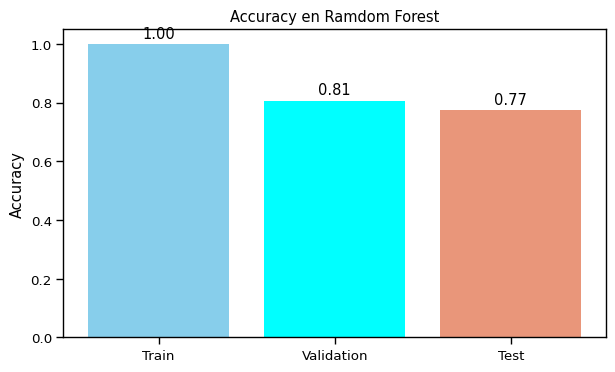

In [281]:
# Calculate accuracy scores
accuracy_train_rf = accuracy_score(Y_train, y_train_pred_rf)
accuracy_val_rf = accuracy_score(Y_val, y_val_pred_rf)
accuracy_test_rf = accuracy_score(Y_test, y_test_pred_rf)

# Create the bar chart
datasets = ['Train', 'Validation', 'Test']
accuracy_scores = [accuracy_train_rf, accuracy_val_rf, accuracy_test_rf]

plt.figure(figsize=(7, 4))
plt.bar(datasets, accuracy_scores, color=['skyblue', 'cyan', 'darksalmon'])

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy en Ramdom Forest')

# Add value labels on top of bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')  # Adjust 0.01 for spacing

plt.show()

In [282]:
print("\n" + "="*50)
print("RESULTADO EN ENTRENAMIENTO")
print("="*50)
print(classification_report(Y_train, y_train_pred_rf))
print("\n" + "="*50)
print("RESULTADO EN VALIDACIÓN")
print("="*50)
print(classification_report(Y_val, y_val_pred_rf))
print("\n" + "="*50)
print("RESULTADO EN PRUEBA")
print("="*50)
print(classification_report(Y_test, y_test_pred_op))



RESULTADO EN ENTRENAMIENTO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3602
           1       1.00      1.00      1.00      1305

    accuracy                           1.00      4907
   macro avg       1.00      1.00      1.00      4907
weighted avg       1.00      1.00      1.00      4907


RESULTADO EN VALIDACIÓN
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       780
           1       0.69      0.46      0.55       271

    accuracy                           0.81      1051
   macro avg       0.76      0.69      0.71      1051
weighted avg       0.79      0.81      0.79      1051


RESULTADO EN PRUEBA
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       771
           1       0.61      0.49      0.55       281

    accuracy                           0.78      1052
   macro avg       0.72      0.69      0.70      1052


In [283]:
# classification reports
report_train = classification_report(Y_train, y_train_pred_rf, output_dict=True)
report_val = classification_report(Y_val, y_val_pred_rf, output_dict=True)
report_test = classification_report(Y_test, y_test_pred_rf, output_dict=True)

# Se extraen metricas
classes = ['Churn: 0', 'Churn: 1']  #  CHURN
metrics = ['precision', 'recall', 'f1-score']
datasets = ['Train', 'Validation', 'Test']

# crear list to store the data for the DataFrame
data = []
for dataset, report in zip(datasets, [report_train, report_val, report_test]):
    for metric in metrics:
        for cls in classes:
            data.append([dataset, metric, cls, report[str(cls.split(': ')[1])][metric]])  # Extract class value

# Create a pandas DataFrame
df_graf = pd.DataFrame(data, columns=['Dataset', 'Metric', 'Class', 'Score'])

# Create the grouped bar chart using px.bar
fig = px.bar(df_graf, x='Metric', y='Score', color='Dataset', barmode='group', facet_col='Class',
             title='Reporte de clasificaión por Ramdon Forest',
             labels={'Score': 'Score', 'Metrica': 'Metrica', 'Dataset': 'Dataset'},
             category_orders={'Metric': ['precision', 'recall', 'f1-score']},
             color_discrete_sequence=px.colors.qualitative.Set3)  #

fig.show()
print(f"Accuracy entrenamiento: {train_accuracy_rf}")
print(f"Accuracy validación: {val_accuracy_rf}")
print(f"Accuracy prueba: {test_accuracy_rf}")

Accuracy entrenamiento: 0.9987772569798248
Accuracy validación: 0.8068506184586108
Accuracy prueba: 0.7737642585551331


##MATRIZ DE CONFUSION - RAMDOM FOREST

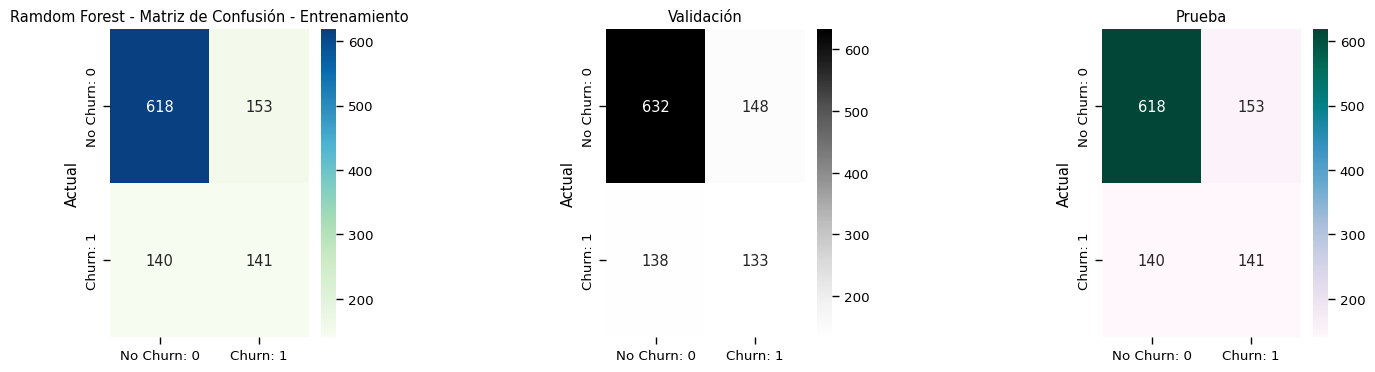

In [284]:
# Genera la matriz de confusión (Prueba)
cm_train_rf = confusion_matrix(Y_train, y_train_pred_rf)
# Genera la matriz de confusión en conjunto de validación
cm_val_rf = confusion_matrix(Y_val, y_val_pred_rf)
# Genera la matriz de confusión (Prueba)
cm_test_rf = confusion_matrix(Y_test, y_test_pred_rf)

# Crea el gráfico de la matriz de confusión usando seaborn
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='GnBu',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Ramdom Forest - Matriz de Confusión - Entrenamiento')

plt.subplot(1, 3, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greys',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Validación')

plt.subplot(1, 3, 3)
#plt.figure(figsize=(8, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Prueba')
plt.subplots_adjust(wspace=1)
plt.show()

###Interpretación matriz de confusión RF
De la matriz de confusión, se observa que: hay un total de 618 + 140 = 758 valores reales de no abandono, y el algoritmo predice 618 como no abandono y 140 como abandono. Por otro lado, hay 153 + 141 = 294 valores reales de abandono, y el algoritmo predice 153 como valores de no abandono y 141 como valores de abandono.

##OPTIMIZANDO MODELO RAMDOM FOREST

La optimización del modelo Random Forest se refiere a ajustar sus hiperparámetros y otras configuraciones para mejorar su rendimiento (es decir, que prediga mejor). No se trata de cambiar el algoritmo en sí, sino de encontrar la mejor combinación de parámetros que haga que el modelo Sea más preciso

No caiga en *SOBREAJUSTE*: cuando aprende demasiado los datos de entrenamiento y falla con los nuevos.

Parametros a opitmizar:
**n_estimators**: Número de árboles en el bosque. Más árboles pueden dar mejor precisión, pero también más tiempo de cómputo.

**max_depth**: Profundidad máxima de cada árbol. Controla cuánto aprende cada árbol.

**min_samples_split**: Número mínimo de muestras para dividir un nodo. Afecta cómo crecen los árboles.

**max_features**: Número de características a considerar al buscar la mejor división. Esto aporta aleatoriedad y evita que los árboles sean todos iguales.

**bootstrap**: Si se usan muestras con reemplazo al crear los árboles.



In [285]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt',]
#    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    model_rf,
    param_grid,
    n_iter=20,  # 20 combinaciones aleatorias
    cv=3,       # 3-fold CV para mayor velocidad
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train, Y_train)

print("\nMejores parámetros encontrados:")
#print(random_search.best_params_)
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
#y_test_pred_rf_op = best_rf_model.predict(X_test)
#accuracy_rf_op = accuracy_score(Y_test, y_test_pred_rf_op)
#print("Test Accuracy:", accuracy_rf_op)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores parámetros encontrados:
Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [286]:
# Evaluate the best model on the test set
y_test_pred_rf_op = best_rf_model.predict(X_test)
accuracy_rf_op = accuracy_score(Y_test, y_test_pred_rf_op)
print("Test Accuracy:", accuracy_rf_op)

Test Accuracy: 0.7661596958174905


In [287]:
print(classification_report(Y_test, y_test_pred_rf_op))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       771
           1       0.55      0.71      0.62       281

    accuracy                           0.77      1052
   macro avg       0.71      0.75      0.72      1052
weighted avg       0.79      0.77      0.77      1052



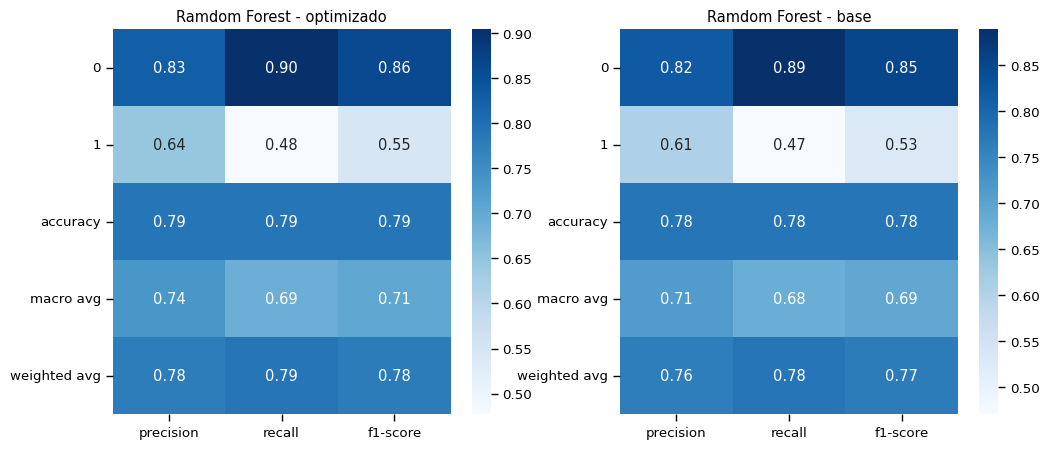


ACCURACY EN OPTIMIZADO Y PRUEBA
Accuracy optimizado: 0.7661596958174905
Accuracy en prueba : 0.7737642585551331


In [353]:
# Reporte de clasificación modelo optimizado
report_rf = classification_report(Y_test, y_test_pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()

report_rf_op = classification_report(Y_test, y_test_pred_rf_op, output_dict=True)
report_rf_op_df = pd.DataFrame(report_rf_op).transpose()
# se selecciona solo las metricas relevantes (precision, recall, f1-score)
metrics_df = report_df[['precision', 'recall', 'f1-score']]
metrics_df_op = report_df_op[['precision', 'recall', 'f1-score']]

# mapa de calor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics_df_op, ax=axes[0], annot=True, cmap='Blues', fmt=".2f")
axes[0].set_title('Ramdom Forest - optimizado') # Fixed indentation

sns.heatmap(metrics_df, ax=axes[1], annot=True, cmap='Blues', fmt=".2f")
axes[1].set_title('Ramdom Forest - base') # Fixed indentation


plt.show()
print("\n" + "="*50)
print("ACCURACY EN OPTIMIZADO Y PRUEBA")
print("Accuracy optimizado:", accuracy_rf_op)
print("Accuracy en prueba :",accuracy_test_rf)
print("="*50)

##AUC Área Bajo la Curva - RAMDOM FOREST

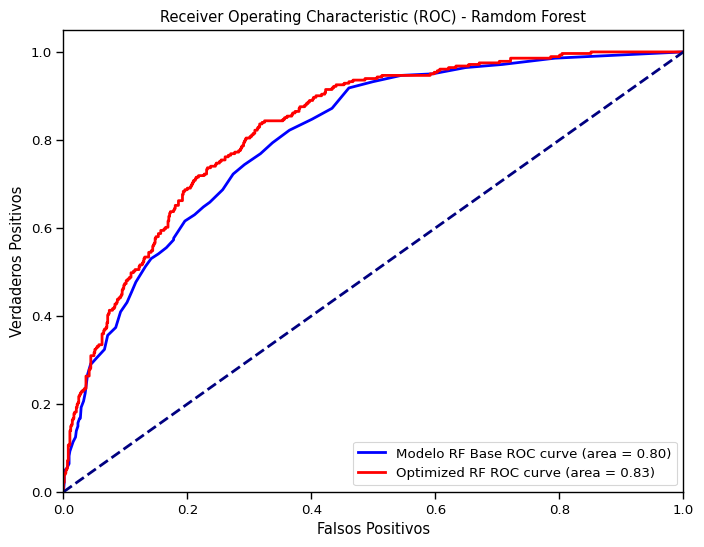

In [315]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc

# --- Original Model ---
y_test_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_test_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


#y_test_pred_rf_op = best_rf_model.predict(X_test)


# --- Optimized Model ---
y_test_prob_rf_op = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf_op, tpr_rf_op, _ = roc_curve(Y_test, y_test_prob_rf_op)
roc_auc_rf_op = auc(fpr_rf_op, tpr_rf_op)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Modelo RF Base ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_rf_op, tpr_rf_op, color='red', lw=2, label=f'Optimized RF ROC curve (area = {roc_auc_rf_op:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) - Ramdom Forest')
plt.legend(loc="lower right")
plt.show()

##Interpretación de la AUC:
####Modelo Original (AUC = 0.80)
####Modelo Optimizado (AUC = 0.82)

###La curva ROC
La curva *ROC* es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TP) y la tasa de falsos positivos (FP) a través de diferentes umbrales de decisión.<br> La curva comienza en la esquina inferior izquierda (0,0) y se extiende hasta la esquina superior derecha (1,1). <br>
Un modelo perfecto tendría una curva que pasa por el punto (0,1), indicandsdfdslta capacidad para distinguir entre las clases.

**AUC	Interpretación***
**0.5*




*	El modelo no tiene capacidad de predecir (como tirar una moneda)

**0.6 - 0.7**	Bajo poder de discriminación

**0.7 - 0.8**	Bueno

**0.8 - 0.9**	Muy

**0.9 - 1.0**	Excelente

###AUC (Área Bajo la Curva)
El AUC mide el área bajo la curva ROC y proporciona un valor escalar único que cuantifica el rendimiento global del clasificador. Un AUC de 1.0 indica un clasificador perfecto, mientras que un AUC de 0.5 indica un rendimiento equivalente a una clasificación aleatoria.

##Análisis de las 15 categorías más importantes según Ramdom Forest

In [290]:
# Obtén la importancia de las características
importances = best_rf_model.feature_importances_
# Crea un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
# Ordena el DataFrame por importancia en orden descendente
feature_importances = feature_importances.sort_values('importance', ascending=False)
# Selecciona las 15 características más importantes
top_15_features = feature_importances.head(15)
# Imprime las 15 características más importantes
print(top_15_features)

             feature  importance
14          Contract    0.182188
4             tenure    0.161411
18      TotalCharges    0.130244
17    MonthlyCharges    0.123551
8     OnlineSecurity    0.073763
11       TechSupport    0.065435
7    InternetService    0.049342
16     PaymentMethod    0.039436
9       OnlineBackup    0.032436
15  PaperlessBilling    0.020828
10  DeviceProtection    0.020423
6      MultipleLines    0.017647
0             gender    0.015224
2            Partner    0.014027
3         Dependents    0.013883


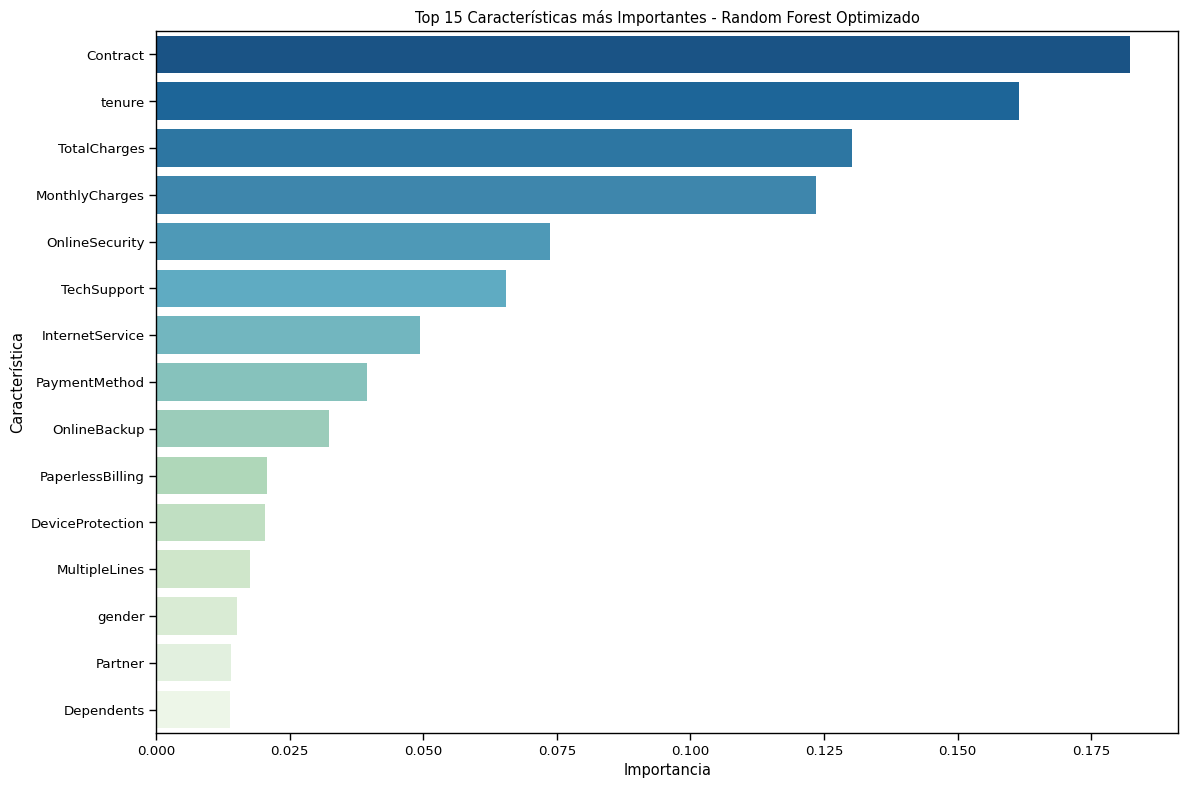

In [291]:
#importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
#importance_df = importance_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_15_features, hue='feature', palette='GnBu_r')
plt.title('Top 15 Características más Importantes - Random Forest Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


***
#Modelo XGBoost
***

###Extreme Gradient Boosting
Es un algoritmo de aprendizaje automático muy eficaz utilizado tanto para tareas de clasificación como de regresión. <br>
<br>
**XGBoost** utiliza el método de boosting por gradiente, que entrena modelos de manera iterativa para corregir los errores de los modelos anteriores.<br>

Incluye regularización L1 y L2 para evitar el sobreajuste y mejorar la generalización del modelo a datos no vistos.
<br>Tiene mecanismos incorporados para manejar datos faltantes, aprendiendo automáticamente la mejor manera de tratar estos valores durante el entrenamiento.
<br>Utiliza un método sofisticado de poda de árboles basado en la reducción de pérdidas, lo que ayuda a controlar la complejidad de los árboles y evitar el sobreajuste.
<br>Está diseñado para el cálculo paralelo, lo que acelera significativamente el proceso de entrenamiento, especialmente en grandes conjuntos de datos.
<br>Incorpora la función de validación cruzada, permitiendo ajustar y seleccionar modelos de manera eficaz.

<br> XGBoost es conocido por su velocidad y eficiencia, lo que lo convierte en una opción preferida en competiciones de aprendizaje automático y aplicaciones del mundo real.

In [335]:
# Convertir los datos a la estructura DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Configuración de los hiperparámetros del modelo
parametros = {
    "max_depth": 3,  # Profundidad máxima de los árboles
    "eta": 0.1,  # Tasa de aprendizaje
    "objective": "binary:logistic",  # Objetivo: Clasificación binaria
    "eval_metric": "logloss"  # Métrica de evaluación: Pérdida logística
}

# Entrenar el modelo
model_xgb = xgb.train(parametros, dtrain, num_boost_round=100)

##Accuracy en XGBoost

In [336]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_xgb = model_xgb.predict(dtrain)
pb_train = [1 if prob > 0.5 else 0 for prob in y_train_pred_xgb]
accuracy_train_xgb = accuracy_score(Y_train, pb_train)
print(f"Precisión xgb en entrenamiento: {accuracy_train_xgb}")

# Realizar predicciones en el conjunto de validación
y_val_pred_xgb = model_xgb.predict(dval)
pb_val = [1 if prob > 0.5 else 0 for prob in y_val_pred_xgb]
accuracy_val_xgb = accuracy_score(Y_val, pb_val)
print(f"Precisión xgb en validación: {accuracy_val_xgb}")

# Realizar predicciones en el conjunto de prueba (solo después de validar)
y_test_pred_xgb = model_xgb.predict(dtest)
pb_test = [1 if prob > 0.5 else 0 for prob in y_test_pred_xgb]
accuracy_test_xgb = accuracy_score(Y_test, pb_test)
print(f"Precisión xgb en prueba: {accuracy_test_xgb}")

Precisión xgb en entrenamiento: 0.8214795190544121
Precisión xgb en validación: 0.8173168411037107
Precisión xgb en prueba: 0.776615969581749


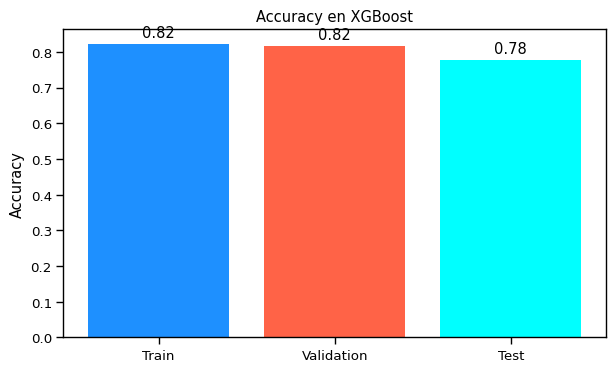

In [294]:
# Create the bar chart
datasets = ['Train', 'Validation', 'Test']
accuracy_scores = [accuracy_train_xgb, accuracy_val_xgb, accuracy_test_xgb]

plt.figure(figsize=(7, 4))
plt.bar(datasets, accuracy_scores, color=['dodgerblue', 'tomato', 'cyan'])

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy en XGBoost')

# Add value labels on top of bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')  # Adjust 0.01 for spacing

plt.show()

In [295]:
print("\n" + "="*50)
print("RESULTADO EN ENTRENAMIENTO")
print("="*50)
report_train=classification_report(Y_train, pb_train)
print(report_train)
print("\n" + "="*50)
print("RESULTADO EN VALIDACIÓN")
print("="*50)
report_val=classification_report(Y_val, pb_val)
print(report_val)
print("\n" + "="*50)
print("RESULTADO EN PRUEBA")
print("="*50)
report_test=classification_report(Y_test, pb_test)
print(report_test)



RESULTADO EN ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3602
           1       0.71      0.56      0.63      1305

    accuracy                           0.82      4907
   macro avg       0.78      0.74      0.75      4907
weighted avg       0.81      0.82      0.81      4907


RESULTADO EN VALIDACIÓN
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       780
           1       0.70      0.50      0.59       271

    accuracy                           0.82      1051
   macro avg       0.77      0.71      0.73      1051
weighted avg       0.81      0.82      0.81      1051


RESULTADO EN PRUEBA
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       771
           1       0.61      0.47      0.53       281

    accuracy                           0.78      1052
   macro avg       0.71      0.68      0.69      1052


##Resultado de clasificación en XGB

In [310]:
# Se extraen metricas
classes = ['Churn: 0', 'Churn: 1']  #  CHURN
metrics = ['precision', 'recall', 'f1-score']
datasets = ['Train', 'Validation', 'Test']

# crear list to store the data for the DataFrame
data = []
for dataset, report in zip(datasets, [report_train, report_val, report_test]):
    # Convert the classification_report output to a dictionary
    report_dict = classification_report(Y_train if dataset == 'Train' else Y_val if dataset == 'Validation' else Y_test,
                                        pb_train if dataset == 'Train' else pb_val if dataset == 'Validation' else pb_test,
                                        output_dict=True)  # para realizar la grafica
    for metric in metrics:
        for cls in classes:
            data.append([dataset, metric, cls, report_dict[str(cls.split(': ')[1])][metric]])  # Extract class value

# pandas DataFrame
df_graf = pd.DataFrame(data, columns=['Dataset', 'Metric', 'Class', 'Score'])

#La grouped bar chart using px.bar
fig = px.bar(df_graf, x='Metric', y='Score', color='Dataset', barmode='group', facet_col='Class',
             title='Reporte de clasificaión por XGBBoost',
             labels={'Score': 'Score', 'Metrica': 'Metrica', 'Dataset': 'Dataset'},
             category_orders={'Metric': ['precision', 'recall', 'f1-score']},
             color_discrete_sequence=px.colors.qualitative.Set2)  #

fig.show()
print(f"Accuracy entrenamiento: {accuracy_test_xgb}")
print(f"Accuracy validación: {accuracy_val_xgb}")
print(f"Accuracy prueba: {accuracy_test_xgb}")

Accuracy entrenamiento: 0.776615969581749
Accuracy validación: 0.8173168411037107
Accuracy prueba: 0.776615969581749


##MATRIZ DE CONFUSION - XGB

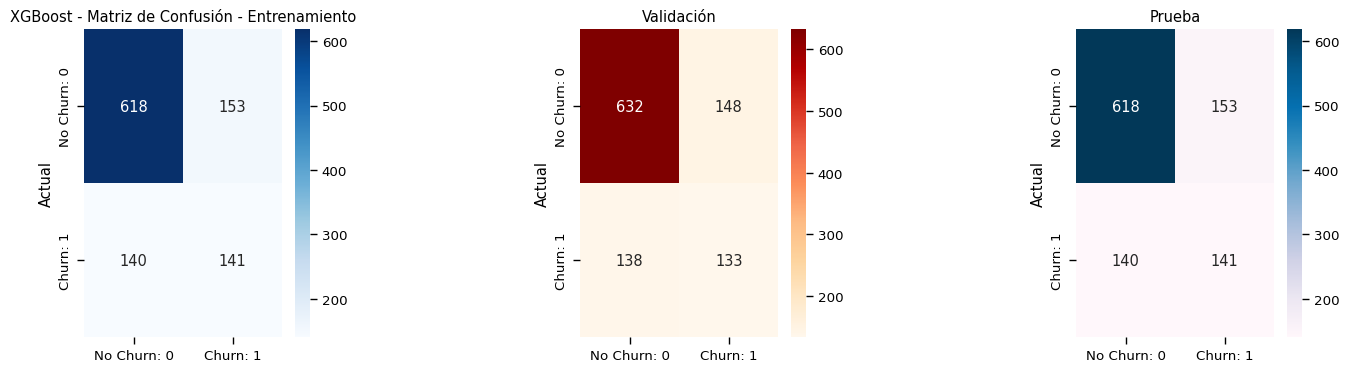

In [311]:
# Genera la matriz de confusión (Prueba)

cm_train_xgb = confusion_matrix(Y_train, pb_train)
# Genera la matriz de confusión en conjunto de validación
cm_val_xgb = confusion_matrix(Y_val, pb_val)
# Genera la matriz de confusión (Prueba)
cm_test_xgb = confusion_matrix(Y_test, pb_test)

# Crea el gráfico de la matriz de confusión usando seaborn
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('XGBoost - Matriz de Confusión - Entrenamiento')

plt.subplot(1, 3, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='OrRd',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Validación')

plt.subplot(1, 3, 3)
#plt.figure(figsize=(8, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='PuBu',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
#plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Prueba')
plt.subplots_adjust(wspace=1)
plt.show()

###Interpretación Matriz de confusión XGB

##OPTIMIZANDO MODELO XGB

La optimización significa ajustar los hiperparámetros del modelo para que tenga el mejor rendimiento posible en tus datos. El objetivo es que el modelo:

* Prediga con más precisión
* Generalice mejor (sin sobreajustarse)
* Sea más eficiente

Principales hiperparámetros que se optimizan:

* **n_estimators**	Número de árboles o iteraciones de boosting
learning_rate	Cuánto contribuye cada árbol nuevo (también llamado eta)
* **max_depth**	Profundidad máxima de los árboles
min_child_weight	Mínimo de datos requeridos en una hoja (para evitar sobreajuste)
* **subsample**	Porcentaje de datos a usar en cada iteración (para aleatoriedad)
* **colsample_bytree**	Porcentaje de columnas a usar por árbol
gamma	Poda: cuánto debe mejorar la pérdida para crear una nueva rama
reg_alpha, reg_lambda	Regularización L1 y L2 para reducir el sobreajuste
* **gamma	Poda**: cuánto debe mejorar la pérdida para crear una nueva rama
* **reg_alpha, reg_lambda**	Regularización L1 y L2 para reducir el sobreajuste

In [298]:
from sklearn.model_selection import RandomizedSearchCV
#  Define the hyperparameter grid or distribution for searching
# Example for Grid Search:
param_grid = {
    'n_estimators': 200,
    'max_depth': 6,
    'learning_rate': 0.1,
    'random_state': 42,
    'eval_metric': 'logloss',
    'n_jobs': -1,
    'tree_method': 'hist',  # Algoritmo más rápido
    'early_stopping_rounds': 15,
    'verbosity': 0
}

# Example for Randomized Search:
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # ... other hyperparameters
}


model_xgb=XGBClassifier(n_estimators=100,learning_rate=0.1)
# Randomized Search:
random_search = RandomizedSearchCV(model_xgb, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, Y_train)
best_xgb_model = random_search.best_estimator_

# Evaluar el mejor modelo en Test
y_pred_xgb_op = best_xgb_model.predict(X_test)
test_accuracy_xgb_op = accuracy_score(Y_test, y_pred_xgb_op)
print("Accuracy:", test_accuracy_xgb_op)

Accuracy: 0.7899239543726235


In [299]:
print(f"Precisión xgb optimizado en prueba: {test_accuracy_xgb_op}")

Precisión xgb optimizado en prueba: 0.7899239543726235


In [300]:
print(classification_report(Y_test, y_pred_xgb_op))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       771
           1       0.64      0.48      0.55       281

    accuracy                           0.79      1052
   macro avg       0.74      0.69      0.71      1052
weighted avg       0.78      0.79      0.78      1052



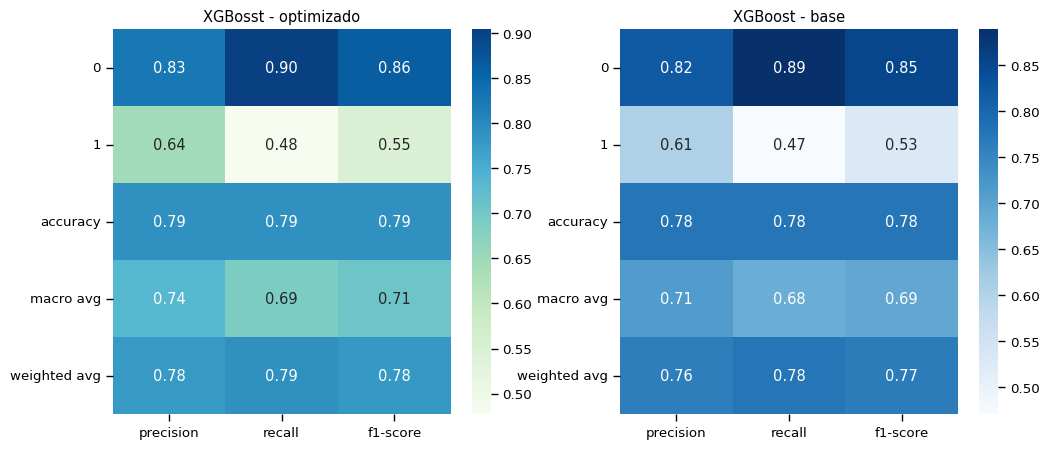


ACCURACY EN OPTIMIZADO Y PRUEBA
Accuracy optimizado: 0.7899239543726235
Accuracy en prueba : 0.776615969581749


In [339]:
# Reporte de clasificación modelo optimizado
report_xgb = classification_report(Y_test, pb_test, output_dict=True)
report_xgb_df = pd.DataFrame(report_xgb).transpose()

report_xgb_op = classification_report(Y_test, y_pred_xgb_op, output_dict=True)
report_xgb_df_op = pd.DataFrame(report_op).transpose()
# se selecciona solo las metricas relevantes (precision, recall, f1-score)
metrics_df = report_xgb_df[['precision', 'recall', 'f1-score']]
metrics_df_op = report_xgb_df_op[['precision', 'recall', 'f1-score']]

# mapa de calor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(metrics_df_op, ax=axes[0], annot=True, cmap='GnBu', fmt=".2f")
axes[0].set_title('XGBosst - optimizado') # Fixed indentation

sns.heatmap(metrics_df, ax=axes[1], annot=True, cmap='Blues', fmt=".2f")
axes[1].set_title('XGBoost - base') # Fixed indentation


plt.show()
print("\n" + "="*50)
print("ACCURACY EN OPTIMIZADO Y PRUEBA")
print("Accuracy optimizado:", test_accuracy_xgb_op)
print("Accuracy en prueba :",accuracy_test_xgb)
print("="*50)

##AUC Área Bajo la Curva - XGBoost

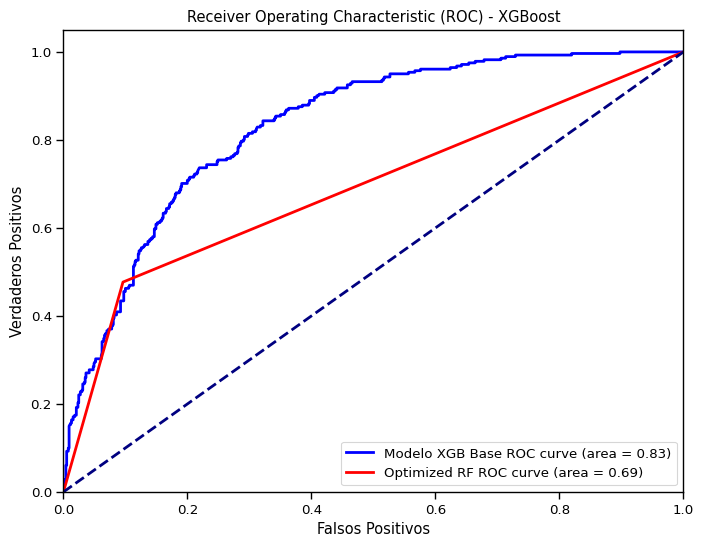

In [330]:
# --- Original Model ---
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_test_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
# --- Optimized Model ---
fpr_xgb_op, tpr_xgb_op, _ = roc_curve(Y_test, y_pred_xgb_op)
roc_auc_xgb_op = auc(fpr_xgb_op, tpr_xgb_op)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'Modelo XGB Base ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot(fpr_xgb_op, tpr_xgb_op, color='red', lw=2, label=f'Optimized RF ROC curve (area = {roc_auc_xgb_op:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()

###Interpretación de este descenso en la AUC

* Es posible que la optimización de los hiperparámetros, tomando mayor parte en el conjunto de entrenamiento, y que el modelo no generalice bien al conjunto de prueba.
* Tal vez se opto para otra métrica (como accuracy o log-loss) y no para AUC ROC específicamente. En este caso fue **log-loss**.
* Erronea combinación de parámetros como un **learning rate** muy alto, poca profundidad, o demasiada regularización pueden hacer que el modelo aprenda menos de lo necesario.


##Análisis de las 15 categorías más importantes según Ramdom Forest

In [303]:
# Obtén la importancia de las características
importances = best_xgb_model.feature_importances_
# Crea un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
# Ordena el DataFrame por importancia en orden descendente
feature_importances = feature_importances.sort_values('importance', ascending=False)
# Selecciona las 15 características más importantes
top_15_features = feature_importances.head(15)
# Imprime las 15 características más importantes
print(top_15_features)

             feature  importance
14          Contract    0.312812
11       TechSupport    0.139970
8     OnlineSecurity    0.129340
7    InternetService    0.105182
4             tenure    0.046577
15  PaperlessBilling    0.031993
17    MonthlyCharges    0.031973
6      MultipleLines    0.030824
13   StreamingMovies    0.026773
3         Dependents    0.023837
18      TotalCharges    0.020751
16     PaymentMethod    0.017637
9       OnlineBackup    0.016243
1      SeniorCitizen    0.015220
0             gender    0.014525


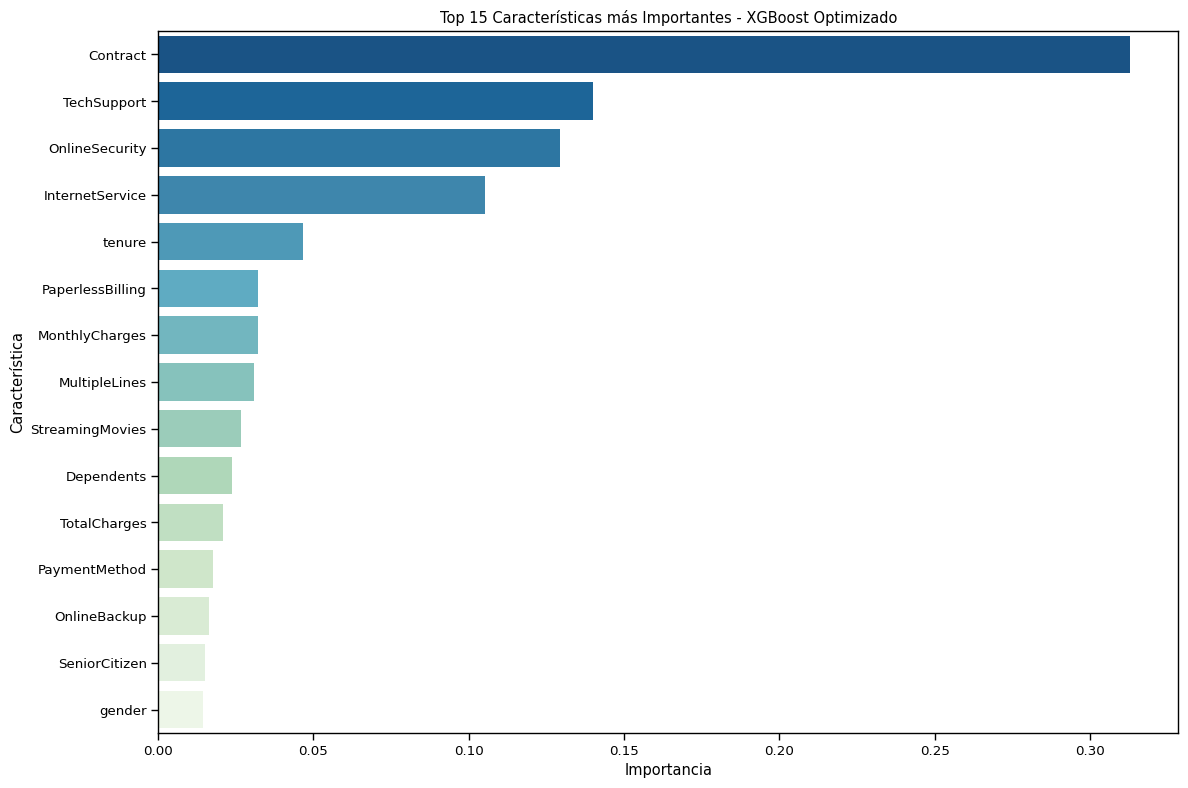

In [314]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_15_features, hue='feature', palette='GnBu_r')
plt.title('Top 15 Características más Importantes - XGBoost Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


***
#COMPARACION DE MODELOS
***
De las predicciones de los algoritmos implementados tanto en base como optimizados, se realiza las comparaciones para seleccionar el más adecuado:
* Arboles de decisión - optimizado
* Ramdom Forest - optimizado
* XGBoost - Optimizado

##Comparación con los reportes de clasificación

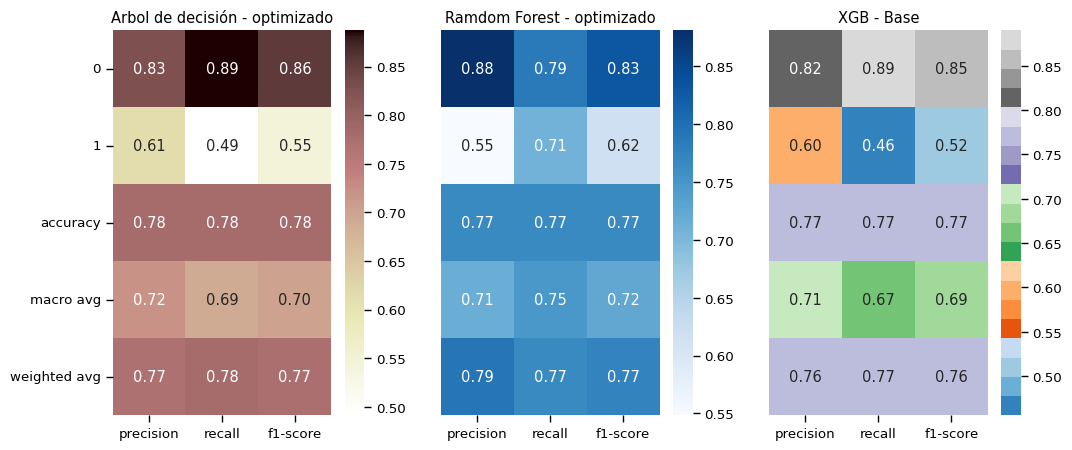


ACCURACY EN LOS 3 MODELOS
Accuracy Arbol de decisión Optimizado 0.7813688212927756
Accuracy Ramdom Forest Optimizado : 0.7661596958174905
Accuracy XGB Base : 0.776615969581749


In [355]:
# Reporte de clasificación 3 modelos
#report_dt = classification_report(Y_test, y_test_pred_op, output_dict=True)
#report_dt_df = pd.DataFrame(report_dt).transpose()
#report_rf = classification_report(Y_test, y_test_pred_rf_op, output_dict=True)
#report_rf_df = pd.DataFrame(report_rf).transpose()
#report_xgb = classification_report(Y_test, dtest, output_dict=True)
#report_xgb_df = pd.DataFrame(report_xgb).transpose()

# se selecciona solo las metricas relevantes (precision, recall, f1-score)
metrics_df1 = report_dt_df_op[['precision', 'recall', 'f1-score']]
metrics_df2 = report_rf_op_df[['precision', 'recall', 'f1-score']]
metrics_df3 = report_xgb_df[['precision', 'recall', 'f1-score']]

# mapa de calor
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.heatmap(metrics_df1, ax=axes[0], annot=True, cmap='pink_r', fmt=".2f")
axes[0].set_title('Arbol de decisión - optimizado') # Fixed indentation
sns.heatmap(metrics_df2, ax=axes[1], annot=True, cmap='Blues', fmt=".2f", yticklabels=False)
axes[1].set_title('Ramdom Forest - optimizado') # Fixed indentation
sns.heatmap(metrics_df3, ax=axes[2], annot=True, cmap='tab20c', fmt=".2f", yticklabels=False)
axes[2].set_title('XGB - Base') # Fixed indentation


plt.show()
print("\n" + "="*50)
print("ACCURACY EN LOS 3 MODELOS")
print("Accuracy Arbol de decisión Optimizado", accuracy_op)
print("Accuracy Ramdom Forest Optimizado :",accuracy_rf_op)
print("Accuracy XGB Base :",accuracy_test_xgb)
print("="*50)

##Comparación con las matrices de confusión

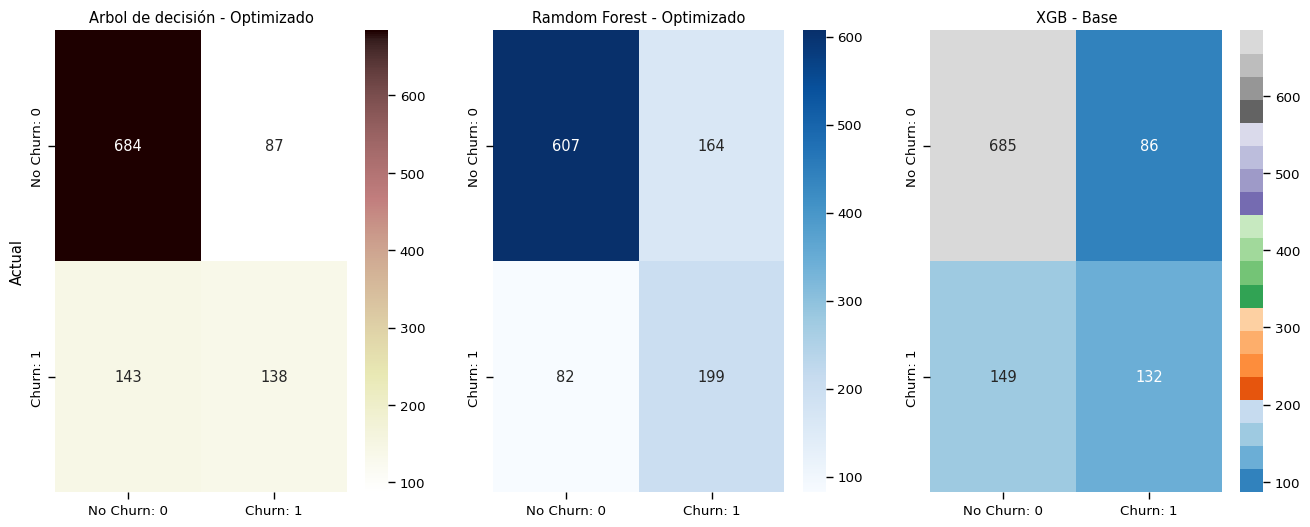

In [306]:
# Genera la matriz de confusión (Prueba)
cm_dt = confusion_matrix(Y_test, y_test_pred_op)
# Genera la matriz de confusión en conjunto de validación
cm_rf = confusion_matrix(Y_test, y_test_pred_rf_op)
# Genera la matriz de confusión (Prueba)
cm_xgb = confusion_matrix(Y_test, pb_test)

# Crea el gráfico de la matriz de confusión usando seaborn
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='pink_r',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.ylabel('Actual')
plt.title('Arbol de decisión - Optimizado')

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.title('Ramdom Forest - Optimizado')

plt.subplot(1, 3, 3)
#plt.figure(figsize=(8, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='tab20c',
            xticklabels=['No Churn: 0', 'Churn: 1'],
            yticklabels=['No Churn: 0', 'Churn: 1'])
plt.title('XGB - Base')
#plt.subplots_adjust(wspace=1)
plt.show()

##Comparación con las curvas ROC AUC

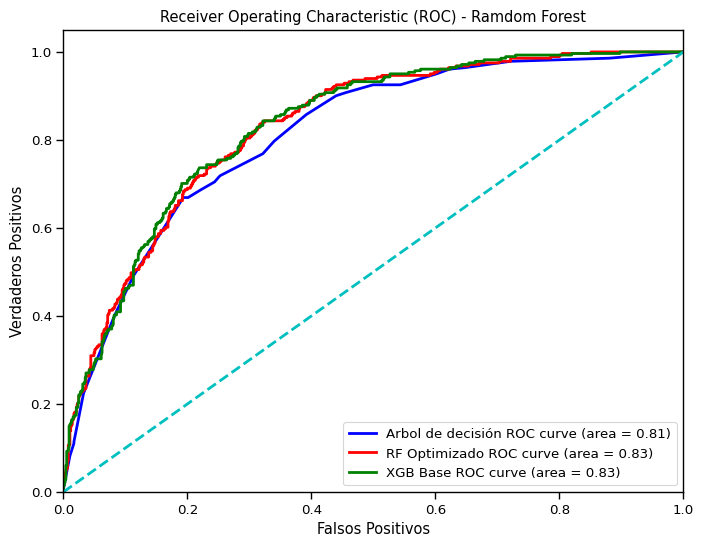

In [331]:
# --- Arbol de decisión optimizado
#fpr1, tpr1, _ = roc_curve(Y_test, y_test_pred_op)
#roc_auc1 = auc(fpr, tpr)
# --- Optimized Model ---
#fpr_op, tpr_op, _ = roc_curve(Y_test, y_test_pred_op)
#roc_auc_op = auc(fpr_op, tpr_op)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_op, tpr_dt_op, color='blue', lw=2, label=f'Arbol de decisión ROC curve (area = {roc_auc_dt_op:.2f})')
plt.plot(fpr_rf_op, tpr_rf_op, color='red', lw=2, label=f'RF Optimizado ROC curve (area = {roc_auc_rf_op:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='g', lw=2, label=f'XGB Base ROC curve (area = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='c', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) - Ramdom Forest')
plt.legend(loc="lower right")
plt.show()

###Selección del modelo


Modelo seleccionado: **XGB Base**, por su ligera ventaja en ROC AUC y mejor equilibrio entre métricas.

## SHAP

SHAP (SHapley Additive exPlanations) es un método basado en la teoría de juegos que explica las predicciones de modelos de machine learning asignando a cada característica un valor de importancia para una predicción particular permitiendo:

+  Entender globalmente qué características son más importantes para el modelo

+  Analizar cómo cada característica afecta las predicciones individuales

+  Identificar relaciones no lineales entre características y el resultado

In [308]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import numpy as np

# 1. Configuración inicial (asegúrate de tener X_train, y_train definidos)
print("Preparando datos y modelo...")

# 2. Definir columnas (verifica que coincidan con tu dataset real)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines',
                    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','churn']

# 3. Preprocesamiento mejorado
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Using sparse=False to ensure consistent output
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_cols),
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols), # handle_unknown='ignore'
    remainder='drop'
)

# 4. Procesar datos manteniendo nombres
print("Procesando datos...")
#X_train_processed = preprocessor.fit_transform(X_train)
#X_val_processed = preprocessor.transform(X_val) # Preprocess validation set
#X_test_processed = preprocessor.transform(X_test)

# Obtener nombres de características
#cat_encoder = preprocessor.named_transformers_['onehotencoder']
feature_names = numeric_cols + list(categorical_cols)

# Convertir a DataFrame (CRUCIAL para SHAP)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

print("Entrenando modelo...")
best_xgb = XGBClassifier(**best_params)

# Move early_stopping_rounds to fit parameters
# Assuming X_val_processed and y_val are defined somewhere
best_xgb.fit(X_train, Y_train,
             eval_set=[(X_val, Y_val)],  # Using the preprocessed validation set
             verbose=False)


Preparando datos y modelo...
Procesando datos...
Entrenando modelo...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=2,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, ...)

***
#Interpretación y Conclusiones
***

La pérdida de clientes (churn) es sin duda perjudicial para la rentabilidad de una empresa. Se pueden implementar diversas estrategias para eliminarla. <br>
La mejor manera de evitarla es que una empresa conozca a fondo a sus clientes. Esto incluye identificar a los clientes en riesgo de abandonar la empresa y trabajar para mejorar su satisfacción.<br> Mejorar el servicio al cliente es, por supuesto, la principal prioridad para abordar este problema. <br>
Fidelizar a los clientes mediante experiencias relevantes y un servicio especializado es otra estrategia para reducir la pérdida de clientes. <br>
Algunas empresas realizan encuestas a los clientes que ya han abandonado la empresa para comprender sus motivos y adoptar un enfoque proactivo para evitar futuras pérdidas.

Existen varias formas de medir el **churn** en una empresa de telecomunicaciones sin depender únicamente de encuestas:<br>

* **Análisis de datos históricos**: Examina los datos de uso y comportamiento de los clientes a lo largo del tiempo. Esto incluye la frecuencia de llamadas, el uso de datos, y las interacciones con el servicio al cliente.

* **Modelos predictivos**: Utiliza técnicas de machine learning para predecir el churn. Algoritmos como árboles de decisión, random forests, y redes neuronales pueden identificar patrones que indican la probabilidad de que un cliente abandone el servicio.

* **Análisis de cohortes**: Agrupa a los clientes según características comunes y analiza su comportamiento a lo largo del tiempo. Esto puede ayudar a identificar tendencias y factores que contribuyen al churn.

* **Segmentación de clientes**: Utiliza técnicas de clustering para segmentar a los clientes en grupos basados en su comportamiento y características. Esto permite identificar grupos de alto riesgo y diseñar estrategias específicas para retenerlos.

* **Análisis de puntos de contacto**: Examina todas las interacciones de los clientes con la empresa, desde la adquisición hasta el servicio postventa. Identificar puntos de fricción puede ayudar a mejorar la experiencia del cliente y reducir el churn.

* **Monitorización de redes sociales**: Analiza las menciones y comentarios sobre la empresa en redes sociales. Esto puede proporcionar información valiosa sobre la satisfacción del cliente y posibles problemas que podrían llevar al churn.<br>

Implementar estas estrategias puede ofrecer una visión más completa y precisa del churn, permitiendo tomar acciones proactivas para mejorar la retención de clientes.

###Algunas estrategias propuestas
* **Predicción del Churn con Machine Learning**
Antes de actuar, que clientes están por irse.

* **Entrená modelos** (Random Forest, XGBoost, etc.) para predecir churn.

* **Seleccion de variables** como: número de reclamos, llamadas al call center, facturas impagas, cambio de plan, velocidad de conexión, etc.

Métricas útiles: AUC ROC, precisión, recall, F1 score.

Esto permite hacer acciones dirigidas antes de que el cliente se vaya.

* **Programas de Retención Personalizados**: Ofertas personalizadas para clientes en riesgo: descuentos, megas gratis, upgrades temporales, etc.

* **Llamadas proactivas de retención** antes de que cancelen.

* **Segmentación Inteligente** Divide a tus clientes en grupos según comportamiento, valor, antigüedad, etc. commo
 - Clientes de alto valor que están en riesgo → priorizar.
 - Clientes nuevos → mejorar onboarding.
 - Clientes recurrentes con muchas quejas → analizar causas.

* **Mejorar la Experiencia del Cliente** Reducir tiempos de espera en atención al cliente.

* **Atención rapida y personalizada** Identificación previa de los servicios contratados por el cliente y un pre-diagnostico desde el primer momento.

* **Facturación** honesta, correcta y a tiempo.

* **Análisis de texto en chats o llamadas** para encontrar patrones.

* **Cross-selling y Upselling Inteligente** Ofrecer productos complementarios que aumenten el valor percibido: Internet + TV + móvil, por ejemplo.

* **KPI** (Tiempo promedio de respuesta) y Dashboards de **Churn** en Tiempo Real
Tener métricas visibles para todo el equipo.

[*GitHub Repository alexlisker churn*](https://github.com/alexlisker/churn)